In [3]:
# import...

import xarray as xr
import os
import pandas as pd
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib.pyplot as plt

os.chdir("/Users/etmu9498/research/code/scripts")
import helper_fns
import make_plots

In [5]:
# find z_i, the thermodynamic mixed layer depth, using zhang's definition:
# z_i = the height where theta_v increases by .5 k from the mean value of data from the lowest 150m
def findzi( z, thetav):
        
    # trim heights and temps to values under 150 m!
    z150 = z[ np.where( z.magnitude <= 150.0 )]
    thetav150 = thetav[ np.where( z.magnitude <= 150.0 )]

    # find the mean virt pot temp value below 150m
    mean_thetav = np.nanmean( thetav150)

    # check if min height is above 150m... if so, z150 will be empty and we can't calculate an avg bl temp :(
    # return false values to avoid plotting errors
    if len( z150) == 0:
        return False, False, False
    
    # case where too little data is saved in file :(
    if len( thetav) < 50:
        return False, False, False
    
    # search through thetas above 150m for values more than .5 K > mean theta
    # the first one found ( lowest one) is the mixed layer height!
    thetav_above150 = thetav[ np.where( z.magnitude > 150.0 )]
    z_above150 = z[ np.where( z.magnitude > 150.0 )]

    # reverse matrices to cycle through lowest values first
    thetav_above150 = np.flip( thetav_above150)
    z_above150 = np.flip( z_above150)
    
    # iterate through values
    for i in range( len( thetav_above150)):
     
        # check if value passes the temperature threshold!
        # return case
        if thetav_above150[i].magnitude >= mean_thetav.magnitude + .5:
            
            threshold = mean_thetav.magnitude + .5
            theta_i = thetav_above150[i]
            z_i = z_above150[i]
            return threshold, theta_i, z_i
        
    # case where no height is found: print out a warning and variables for testing!
    print( "no z_i has been found")
    print( mean_thetav)
    print( z150)
    print( thetav)
    print( np.max( thetav))
    # print( np.max( thetav_above150))


In [37]:
# find vmax, the maximum total wind speed in a profile!
# use optional var to choose max height limit for looking at vars
# inputs: height array z and wind speed array v. Optional: maxh; float in meters
def findvmax( z, v, maxh=False):

#     print( v)
#     print( z)
#     print( len( z))
    
    # case where manually setting a max height to look up to
    if maxh:
        inds = np.where( z.magnitude <= maxh)
        z = z[ inds]
        v = v[ inds]
        
    # find the max wind speed height!
    i_maxv = np.nanargmax( v.magnitude)
    
    # print( i_maxv)
    return z[ i_maxv]

In [ ]:
# calculate and return the bulk richardson number for a profile! 

def find_ri_bulk():

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 302.7507794081322, theta at z_i = 302.75681024060935, z_i = 379.0
sonde plot 0 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 303.51500213640213, theta at z_i = 303.51997718158725, z_i = 862.0
sonde plot 1 saved



threshold = 303.78216127643606, theta at z_i = 303.8134638755399, z_i = 184.0


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


sonde plot 2 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 309.9241360502295, theta at z_i = 309.9304557856845, z_i = 262.0
sonde plot 3 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\numpy_func.py:768: RuntimeWarning: Mean of empty slice
  ret = func(*bound_args.args, **bound_args.kwargs)


z_i couldn't be calculated
sonde plot 4 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 302.4208009988002, theta at z_i = 302.45216361828477, z_i = 447.0
sonde plot 5 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1265: RuntimeWarning: overflow encountered in power
  th_l = potential_temperature(pressure - e, temperature) * (t / t_l) ** (0.28 * r)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1266: RuntimeWarning: overflow encountered in exp
  return th_l * np.exp(r * (1 + 0.448 * r) * (3036. / t_l - 1.78))
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1291: RuntimeWarning: overflow encountered in multiply
  magnitude = magnitude_op(self._magnitude, other_magn

threshold = 303.10092264348066, theta at z_i = 303.13851043115176, z_i = 489.0
sonde plot 6 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1266: RuntimeWarning: overflow encountered in exp
  return th_l * np.exp(r * (1 + 0.448 * r) * (3036. / t_l - 1.78))


threshold = 304.2939224168468, theta at z_i = 304.4049554435609, z_i = 841.0
sonde plot 7 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 302.8075954302078, theta at z_i = 302.82878441630805, z_i = 737.0
sonde plot 8 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 303.97883029098836, theta at z_i = 303.9844472935157, z_i = 284.0
sonde plot 9 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 310.14812201753153, theta at z_i = 310.1485995560951, z_i = 268.0
sonde plot 10 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 304.63639234561265, theta at z_i = 304.64047074752193, z_i = 414.0
sonde plot 11 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 301.9262920944895, theta at z_i = 301.97471780108185, z_i = 295.0
sonde plot 12 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 302.9244164421933, theta at z_i = 302.9336475072496, z_i = 809.0
sonde plot 13 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 305.5134250992528, theta at z_i = 305.55479414796673, z_i = 282.0
sonde plot 14 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 305.61325502280215, theta at z_i = 305.64055330259004, z_i = 285.0
sonde plot 15 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 305.7411997865258, theta at z_i = 305.7498860708343, z_i = 318.0
sonde plot 16 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 303.72510971504863, theta at z_i = 303.78013734988866, z_i = 400.0
sonde plot 17 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 303.45920682713864, theta at z_i = 303.491801299343, z_i = 983.0
sonde plot 18 saved



z_i couldn't be calculated


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\numpy_func.py:768: RuntimeWarning: Mean of empty slice
  ret = func(*bound_args.args, **bound_args.kwargs)


sonde plot 19 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_5028\1214717694.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure( figsize=(16, 16))


threshold = 304.3992183767504, theta at z_i = 304.41091495804835, z_i = 919.0
sonde plot 20 saved



z_i couldn't be calculated


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


sonde plot 21 saved





C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


threshold = 303.49202563663624, theta at z_i = 303.5006763834523, z_i = 220.0
sonde plot 22 saved



threshold = 305.02492994224696, theta at z_i = 305.0811815445892, z_i = 330.0


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


sonde plot 23 saved



threshold = 304.3330058656133, theta at z_i = 304.3334965435282, z_i = 273.0


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


sonde plot 24 saved



threshold = 303.75686047294425, theta at z_i = 303.77603128699513, z_i = 273.0


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


sonde plot 25 saved



threshold = 303.1016929566495, theta at z_i = 303.10873423687264, z_i = 772.0


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


sonde plot 26 saved





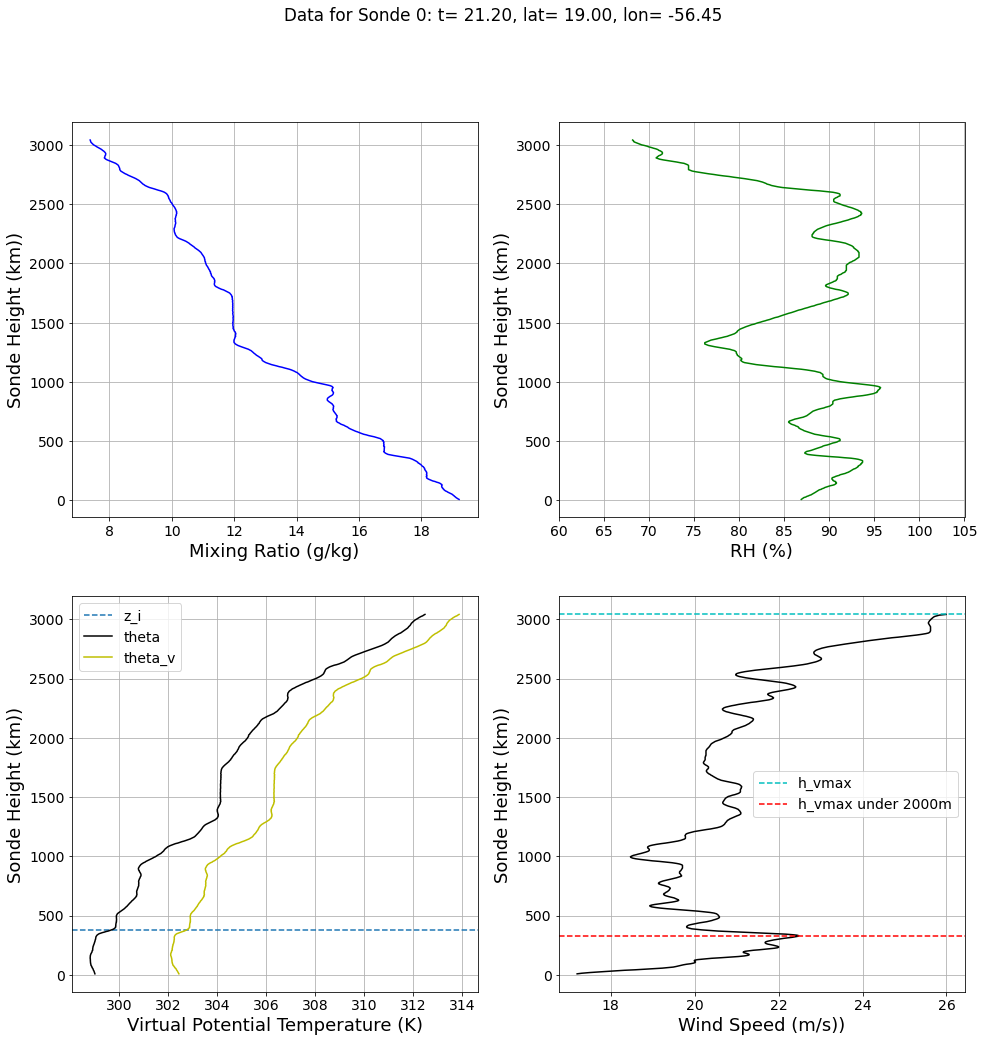

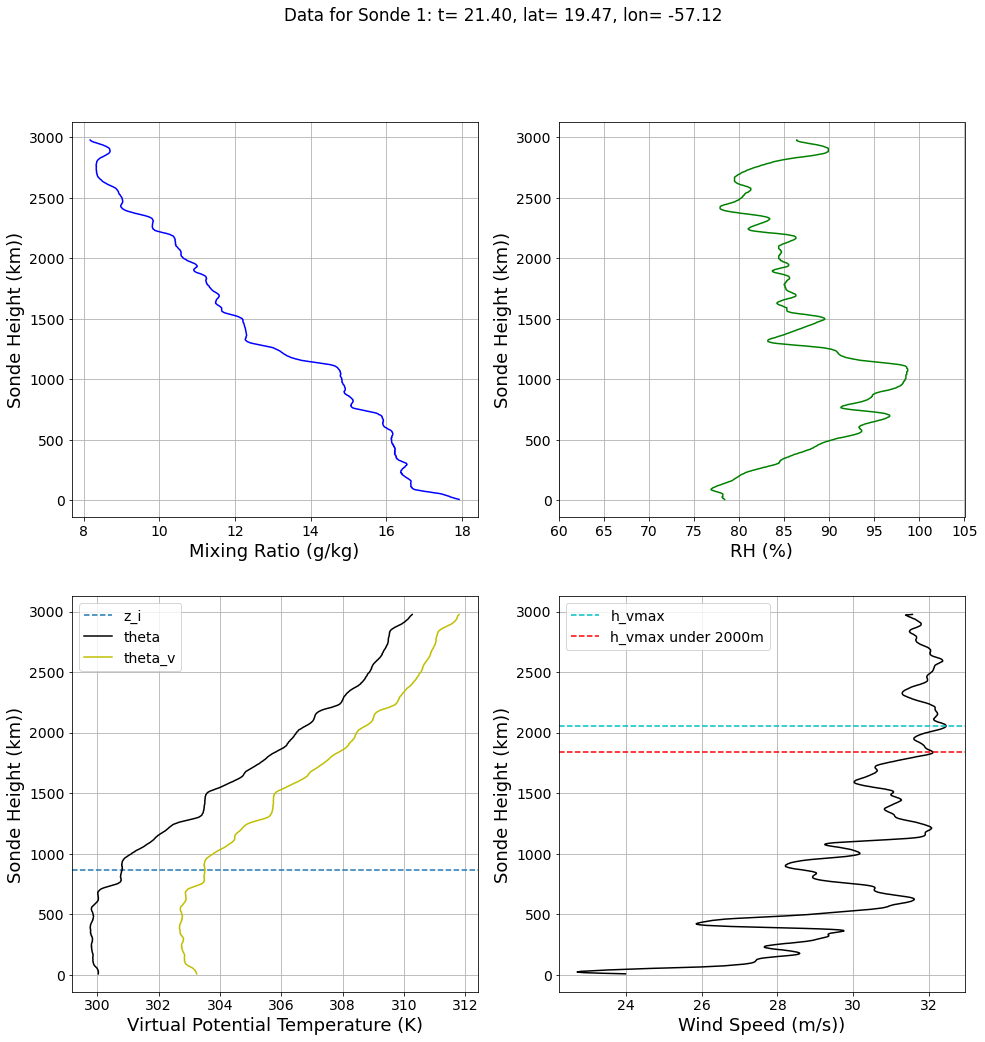

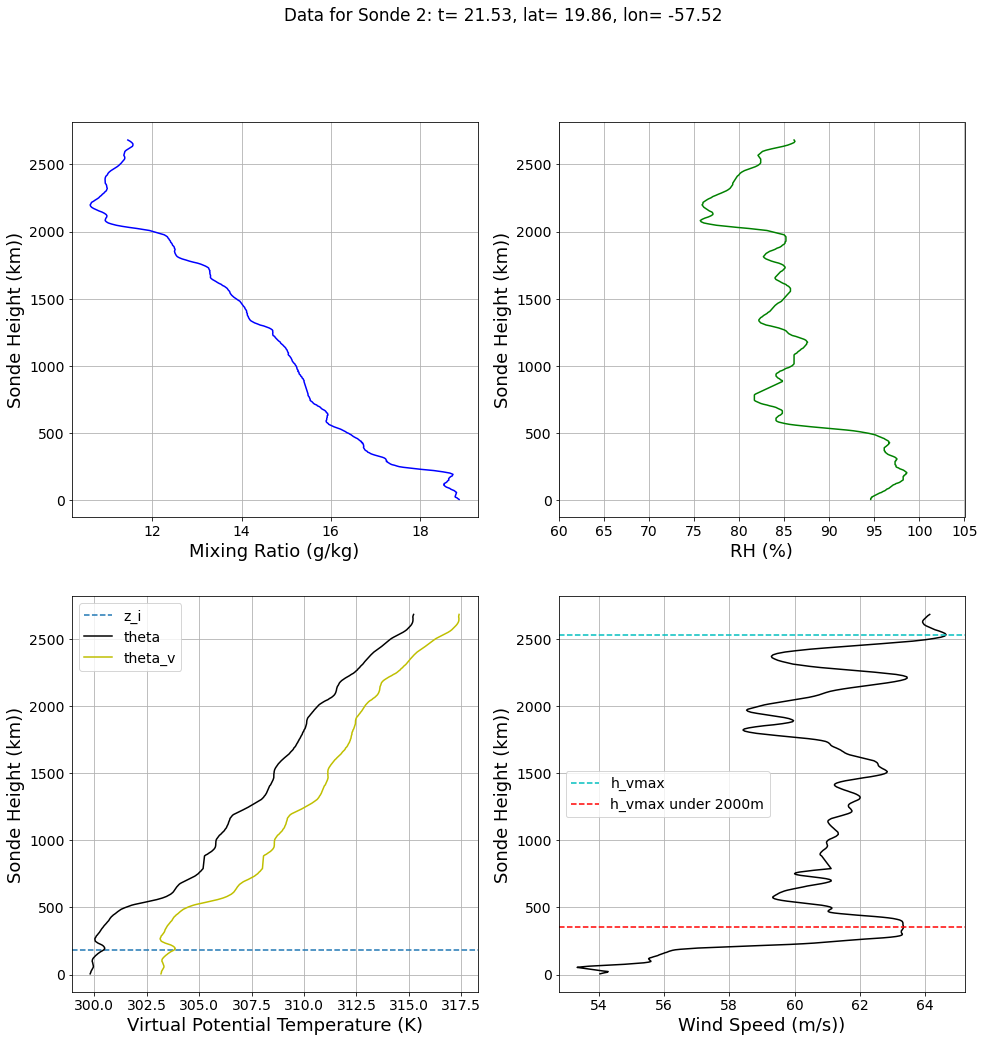

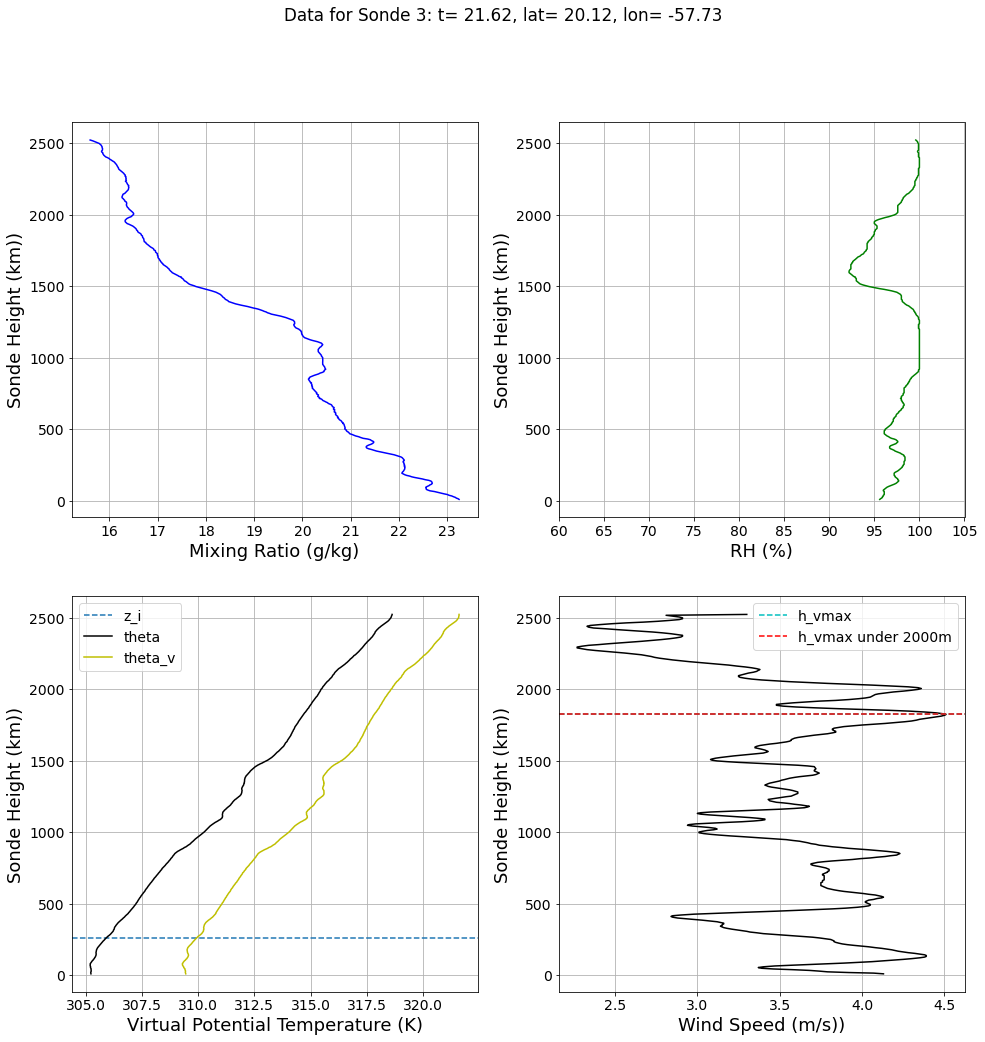

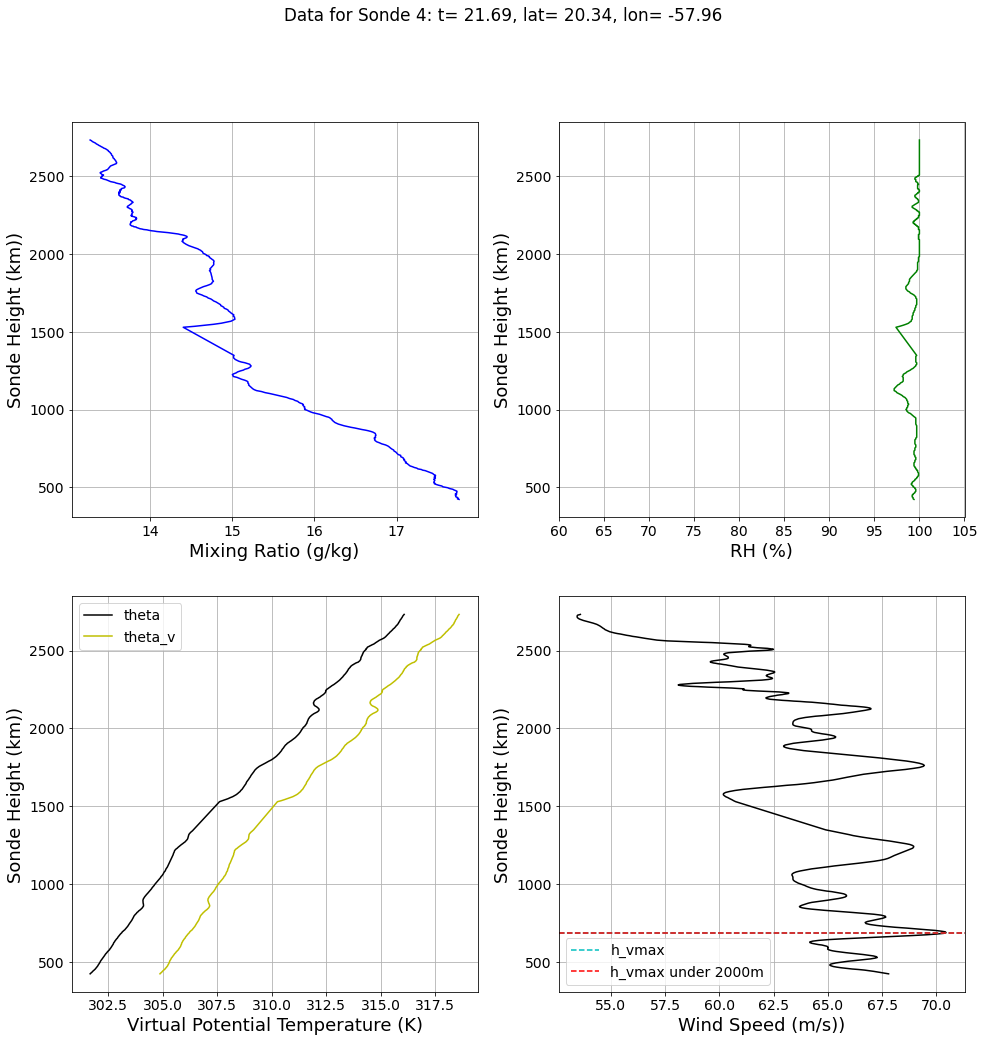

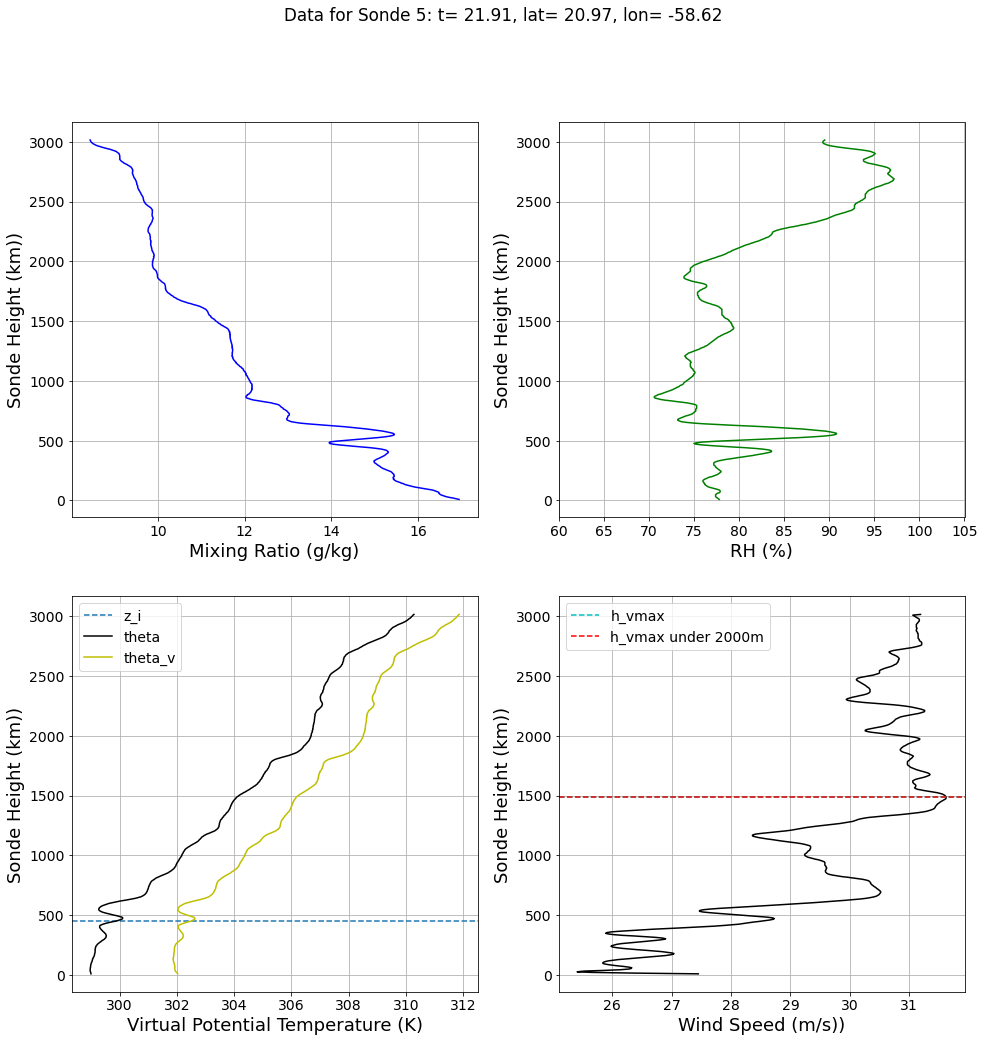

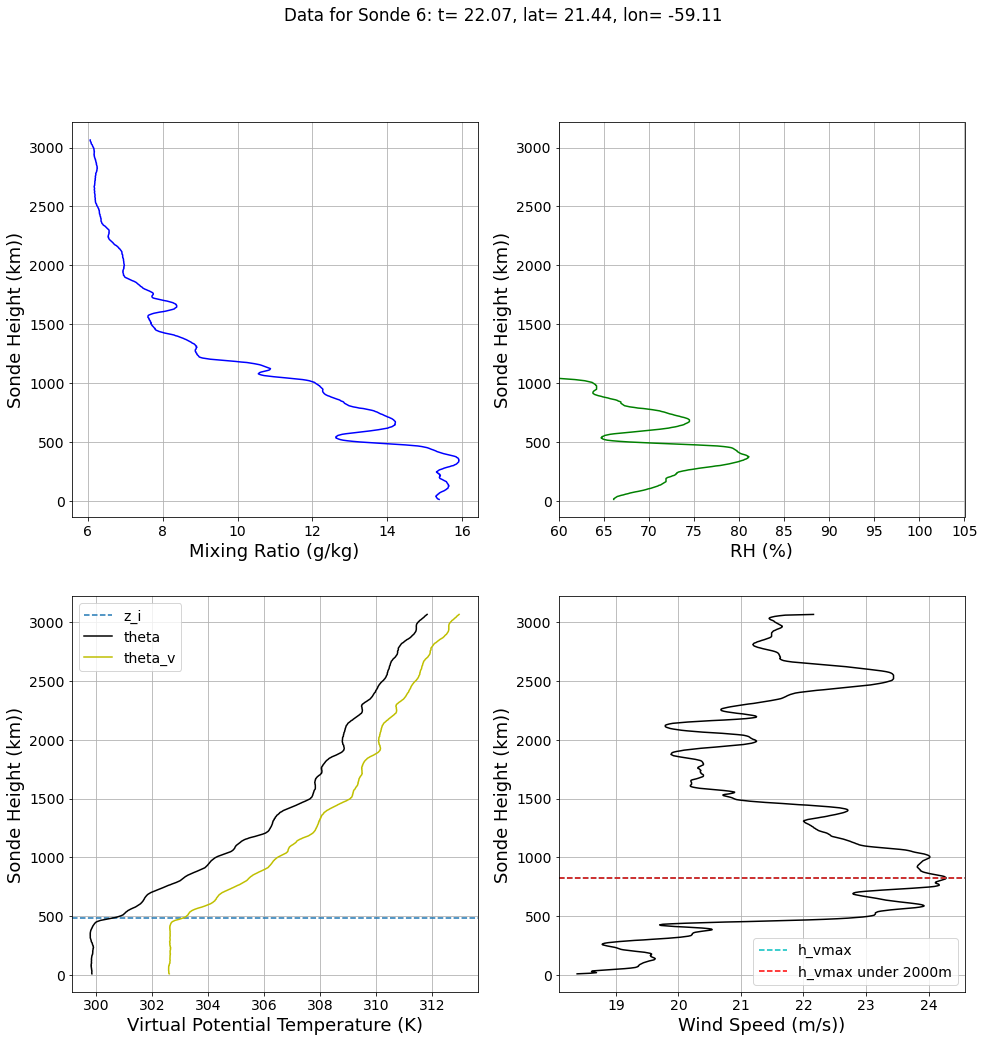

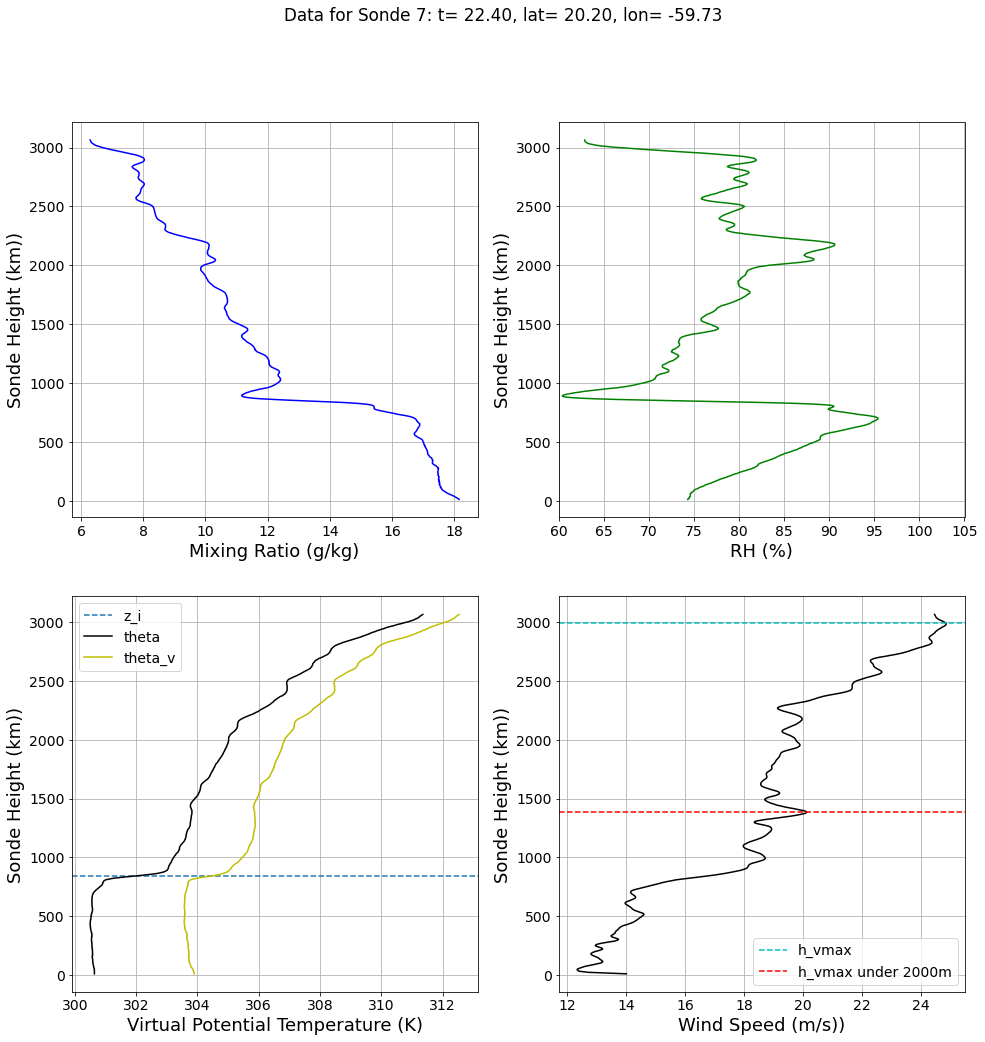

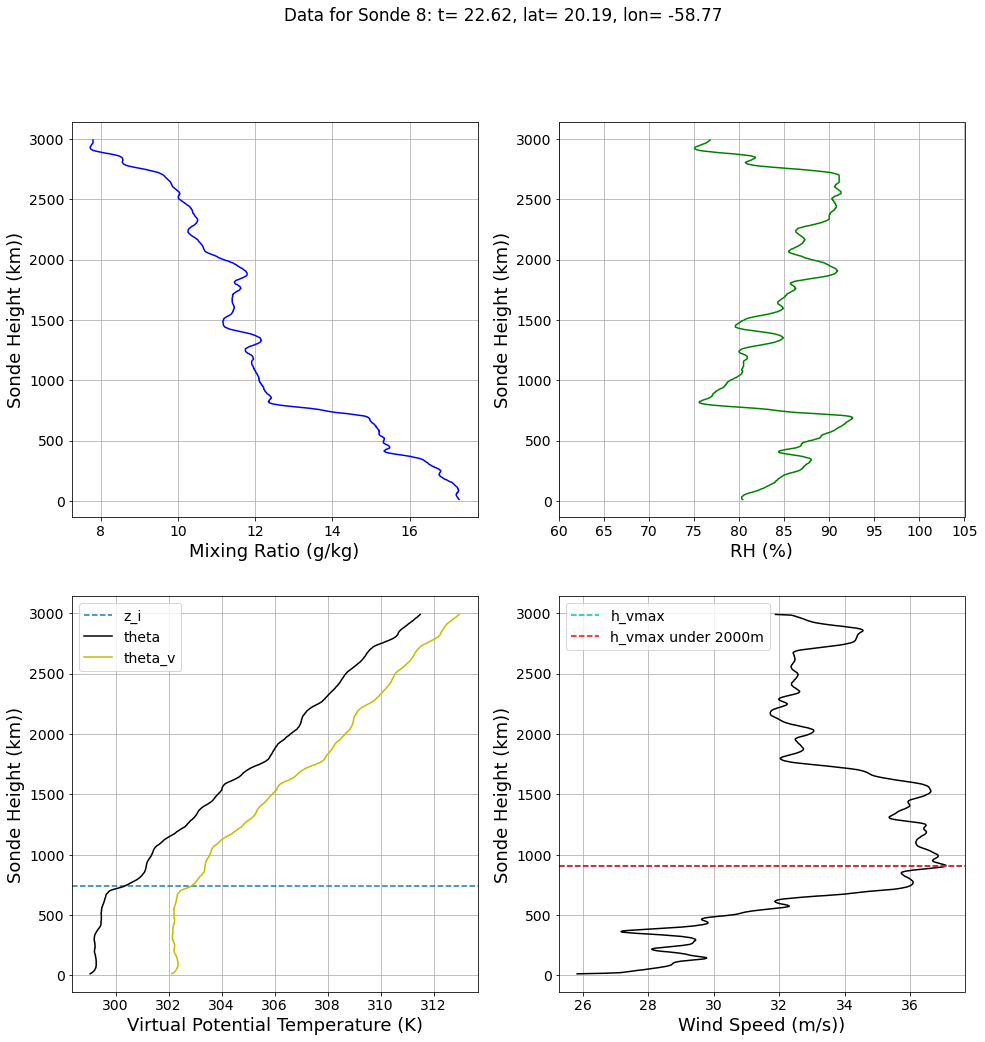

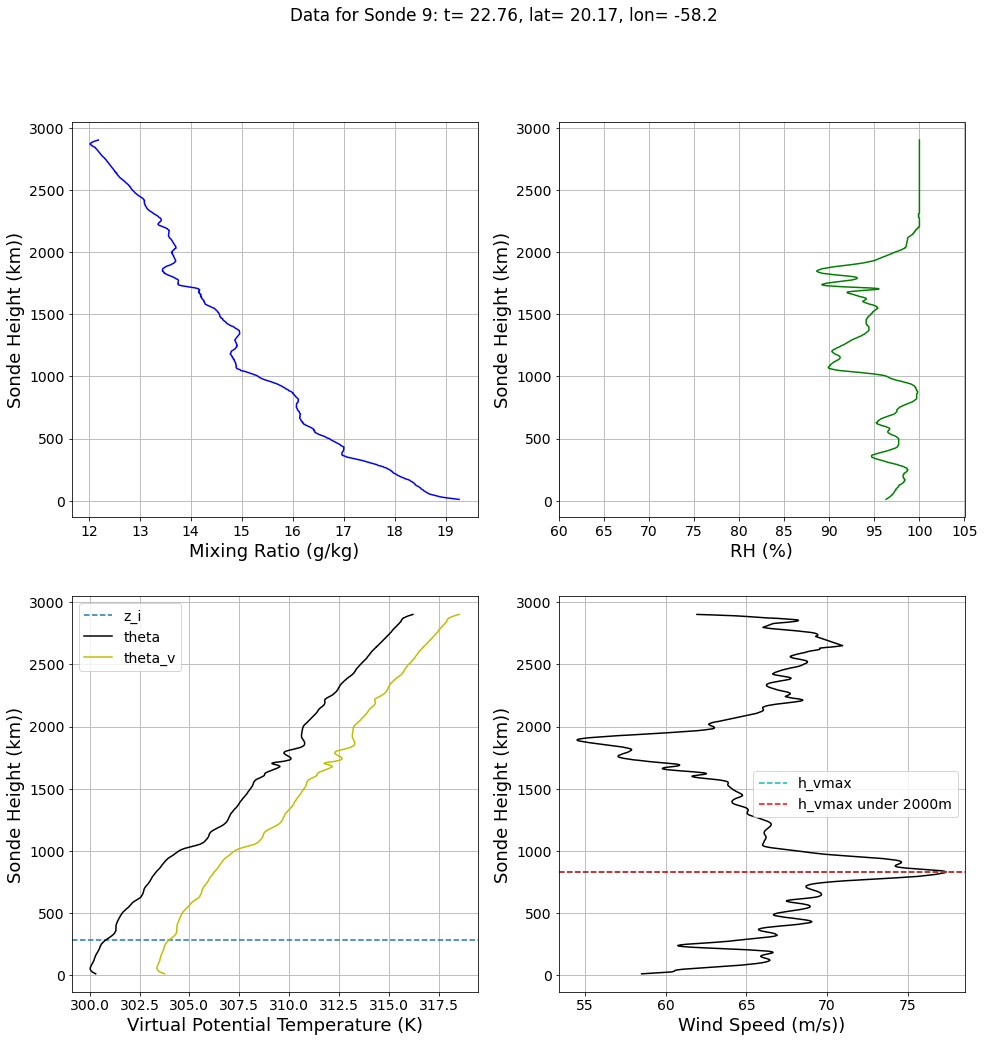

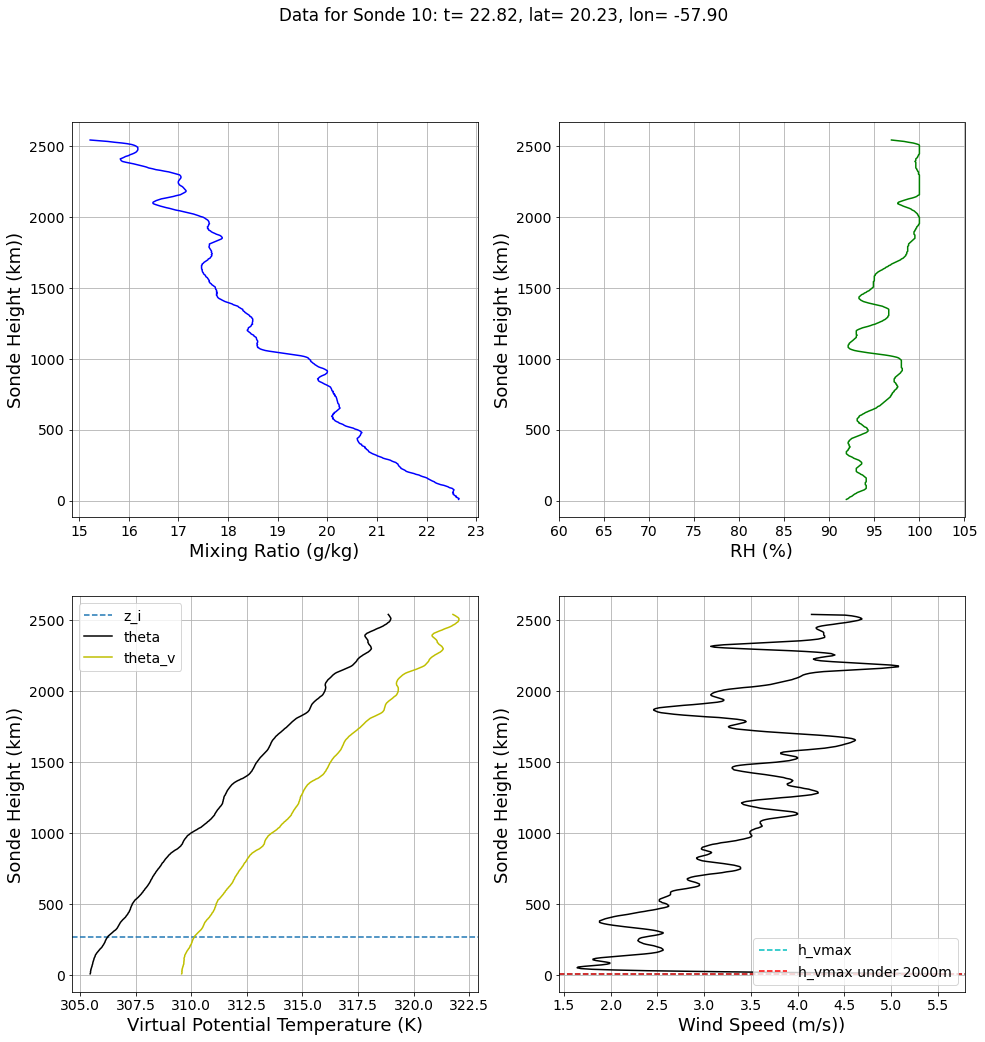

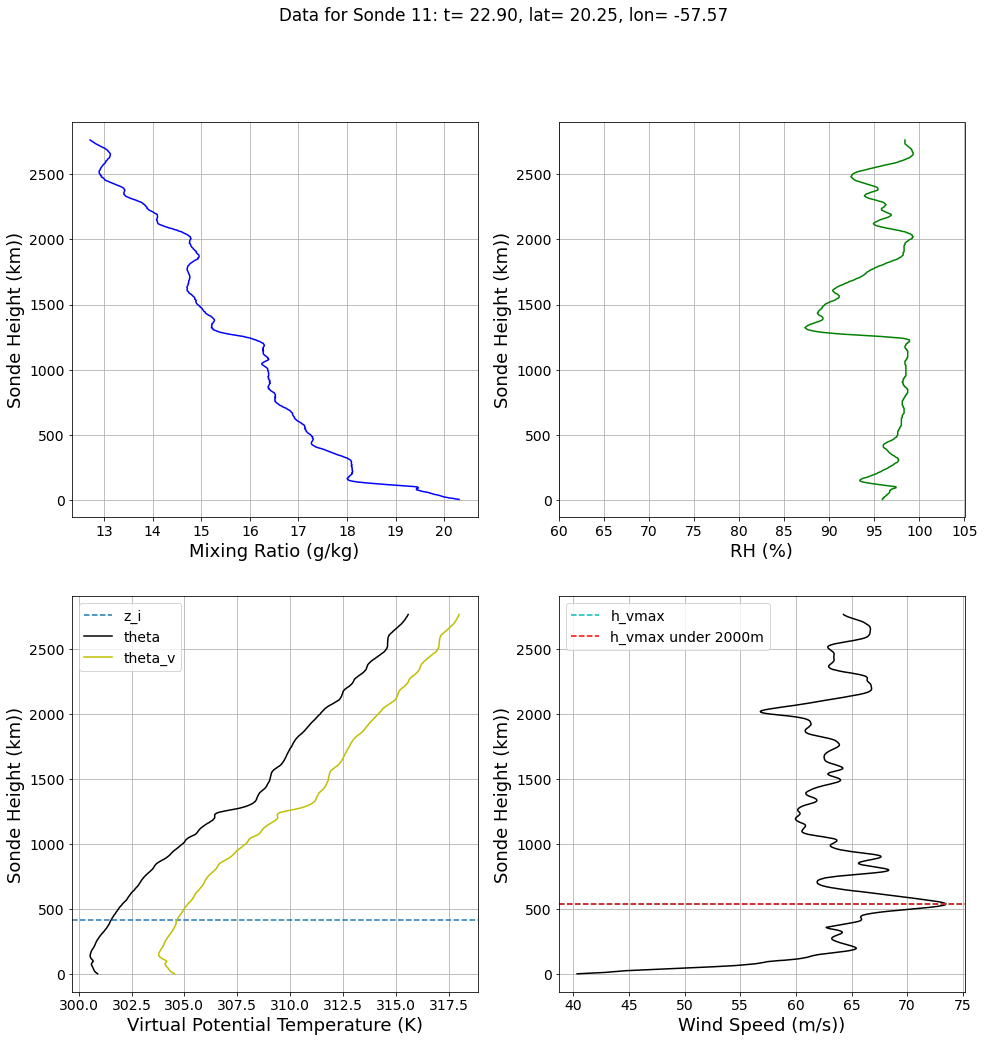

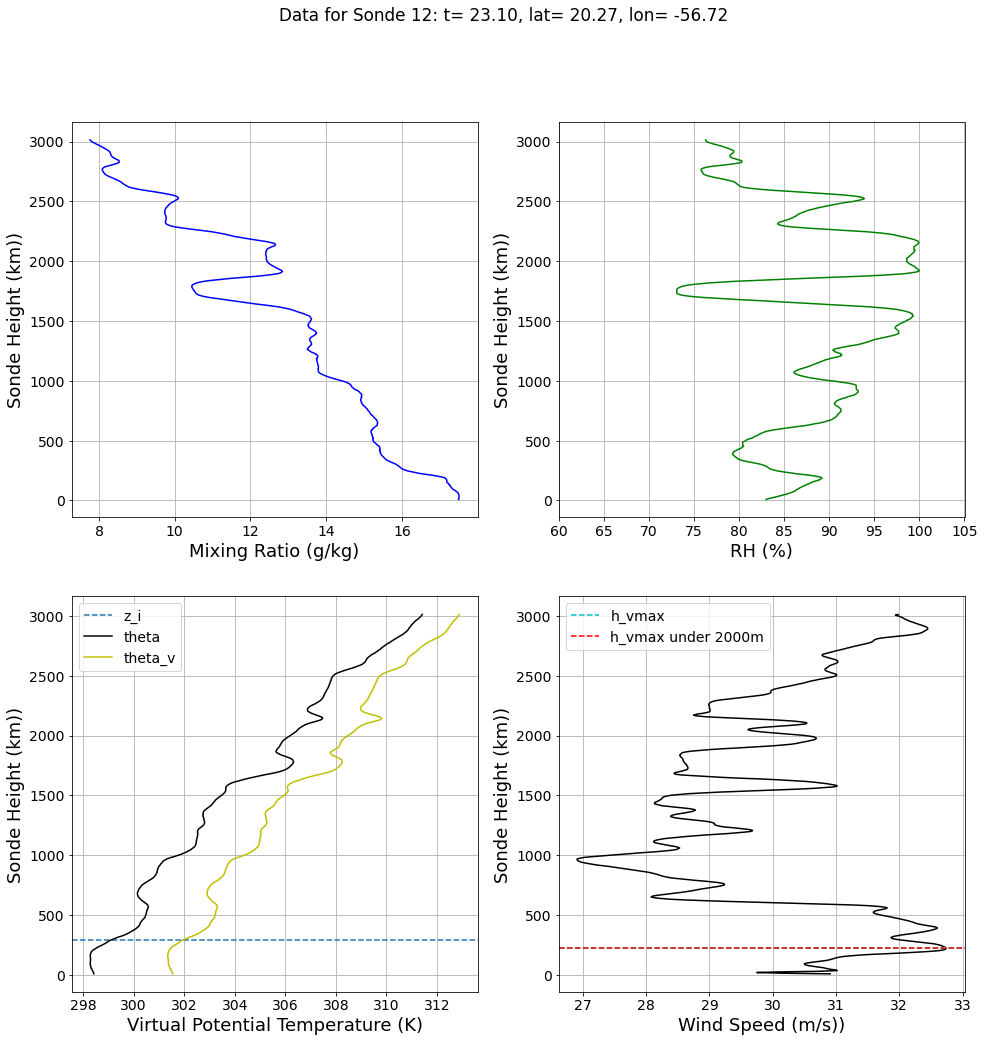

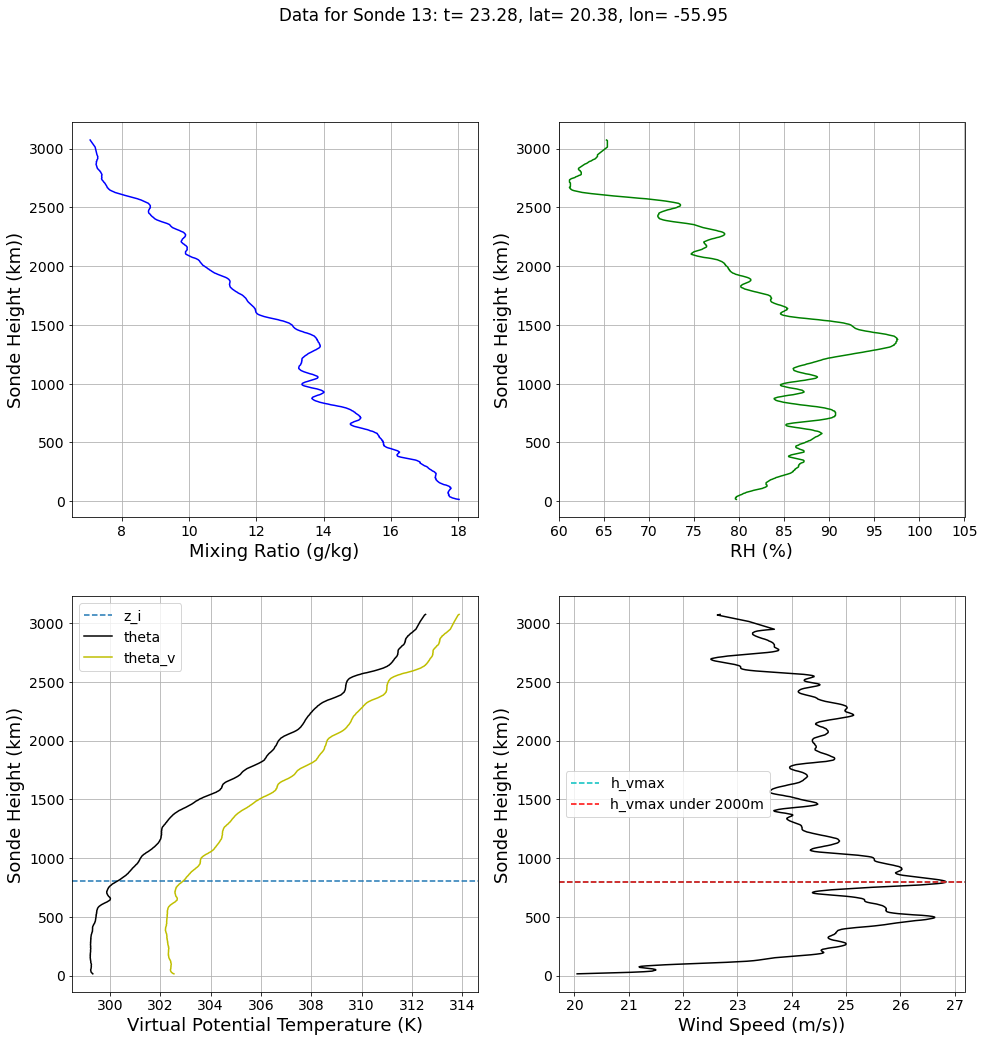

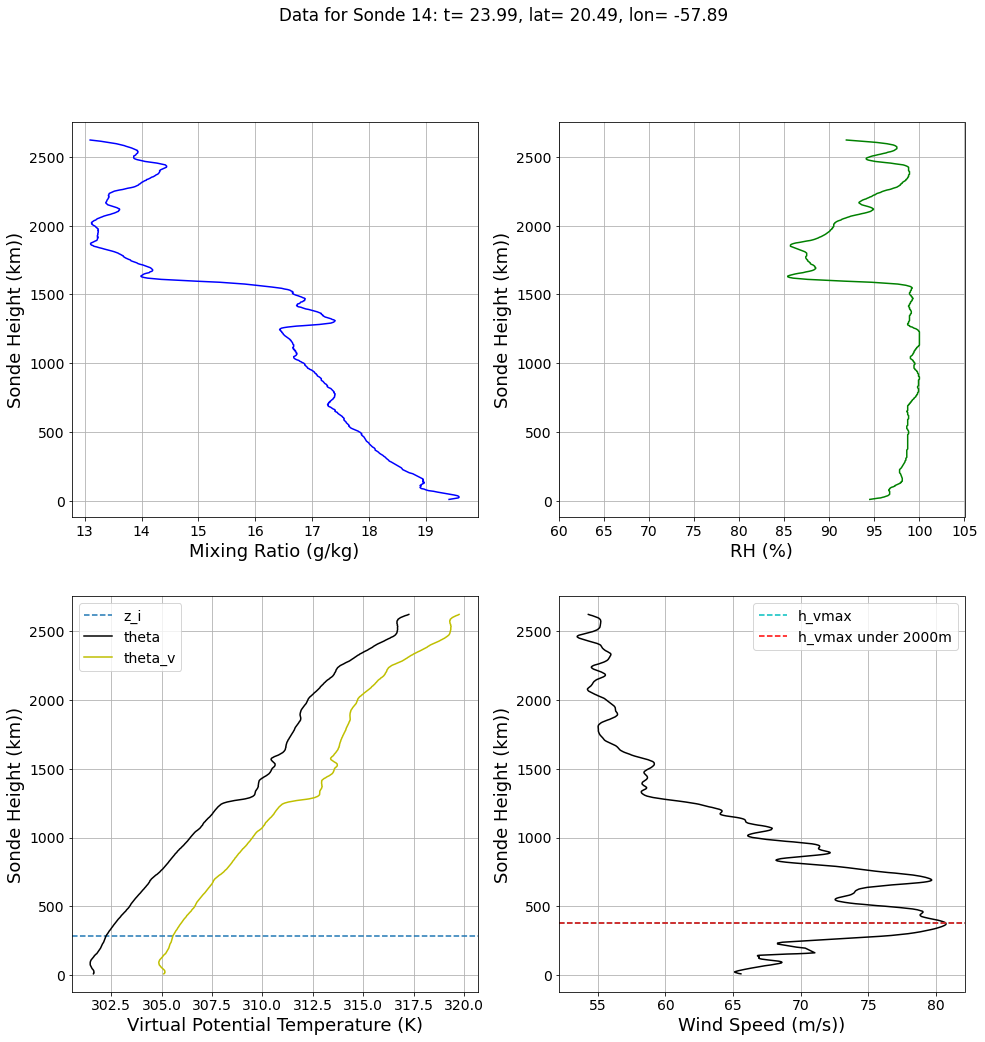

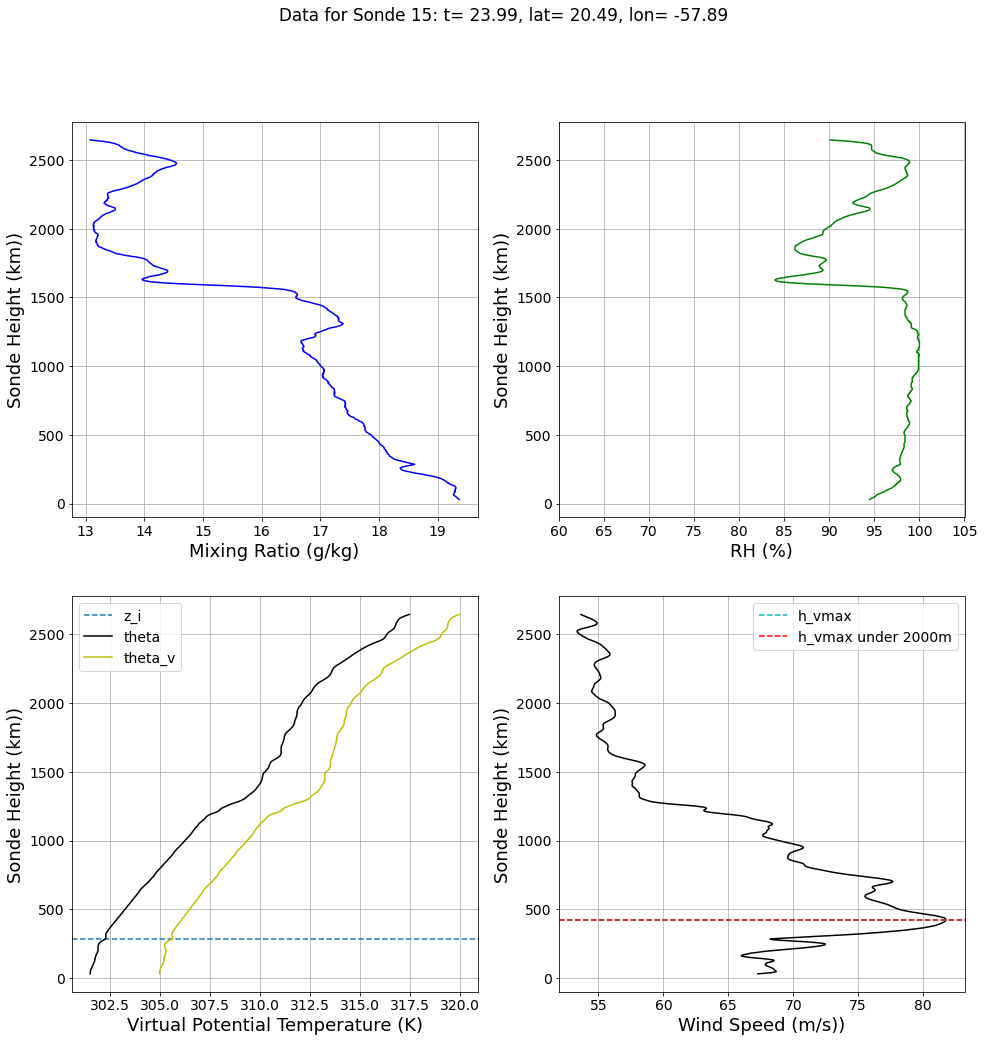

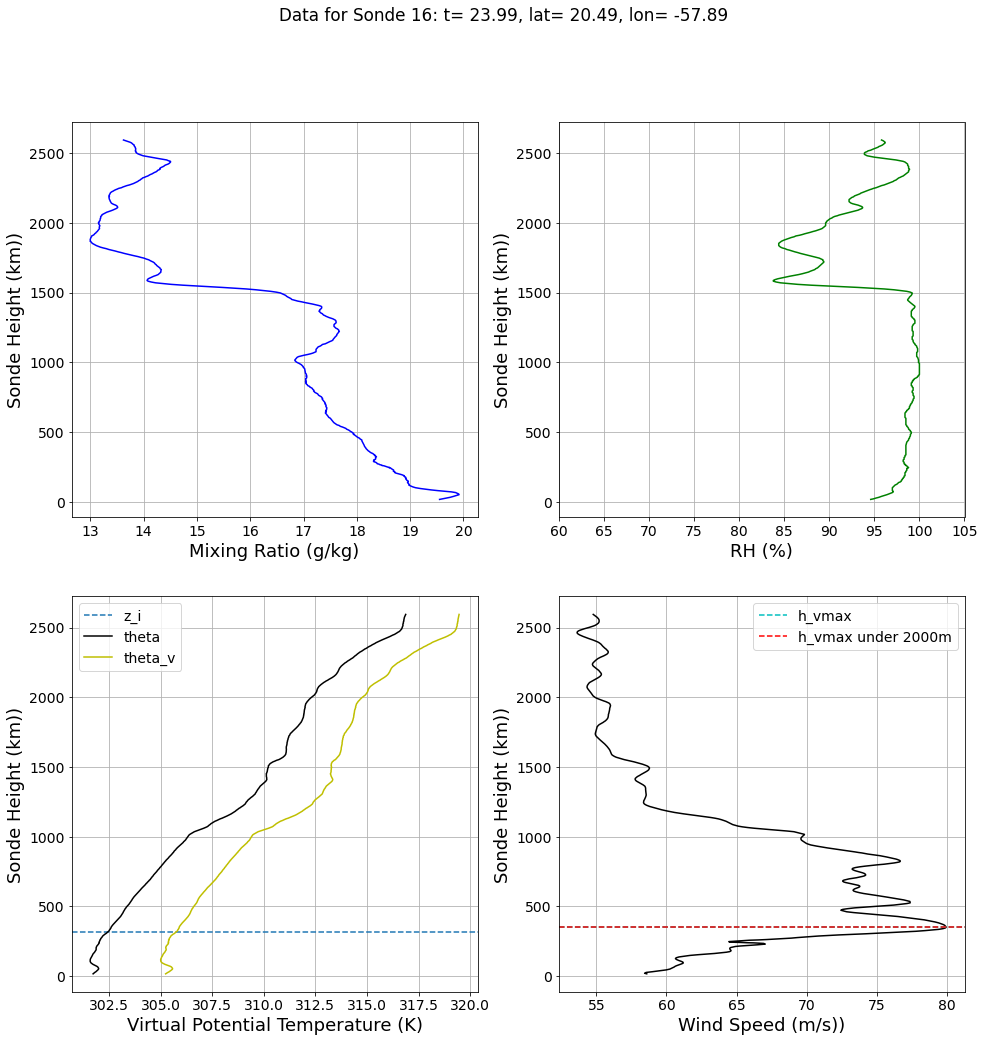

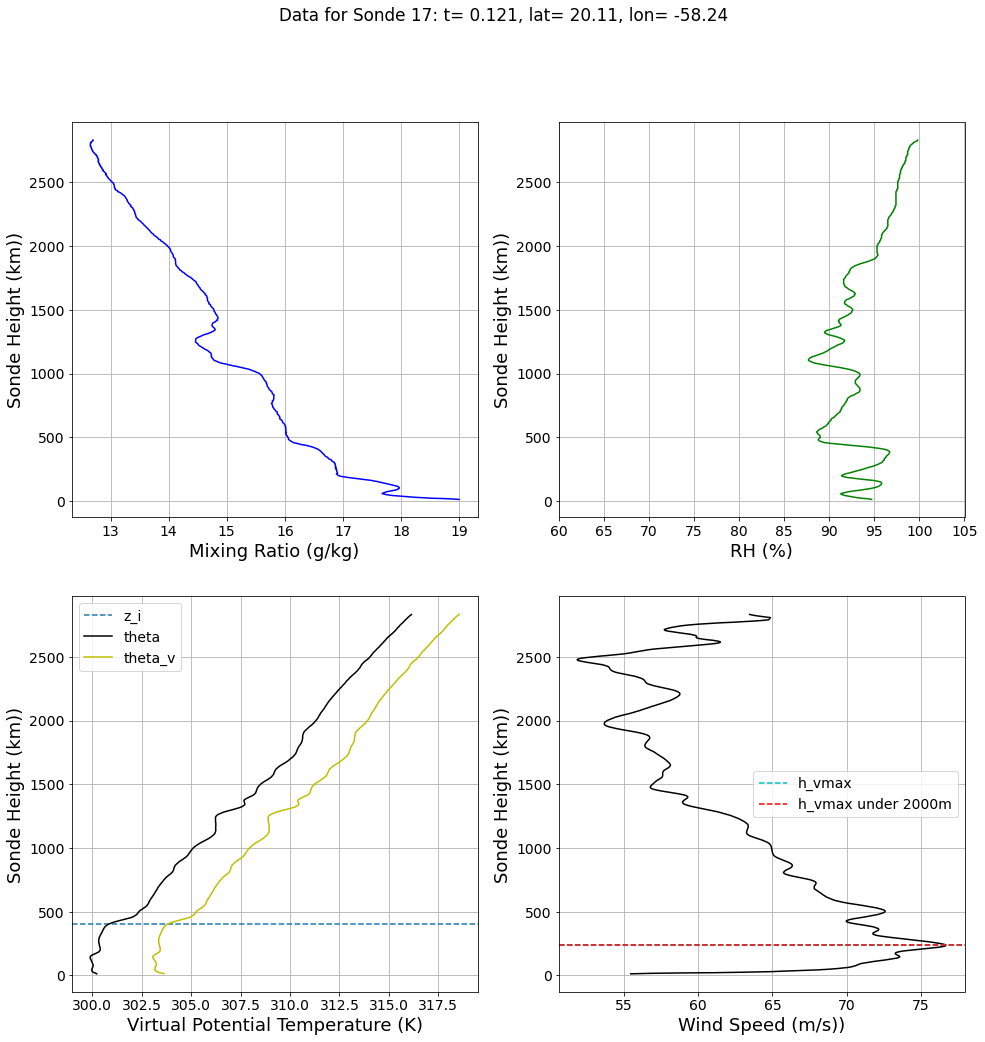

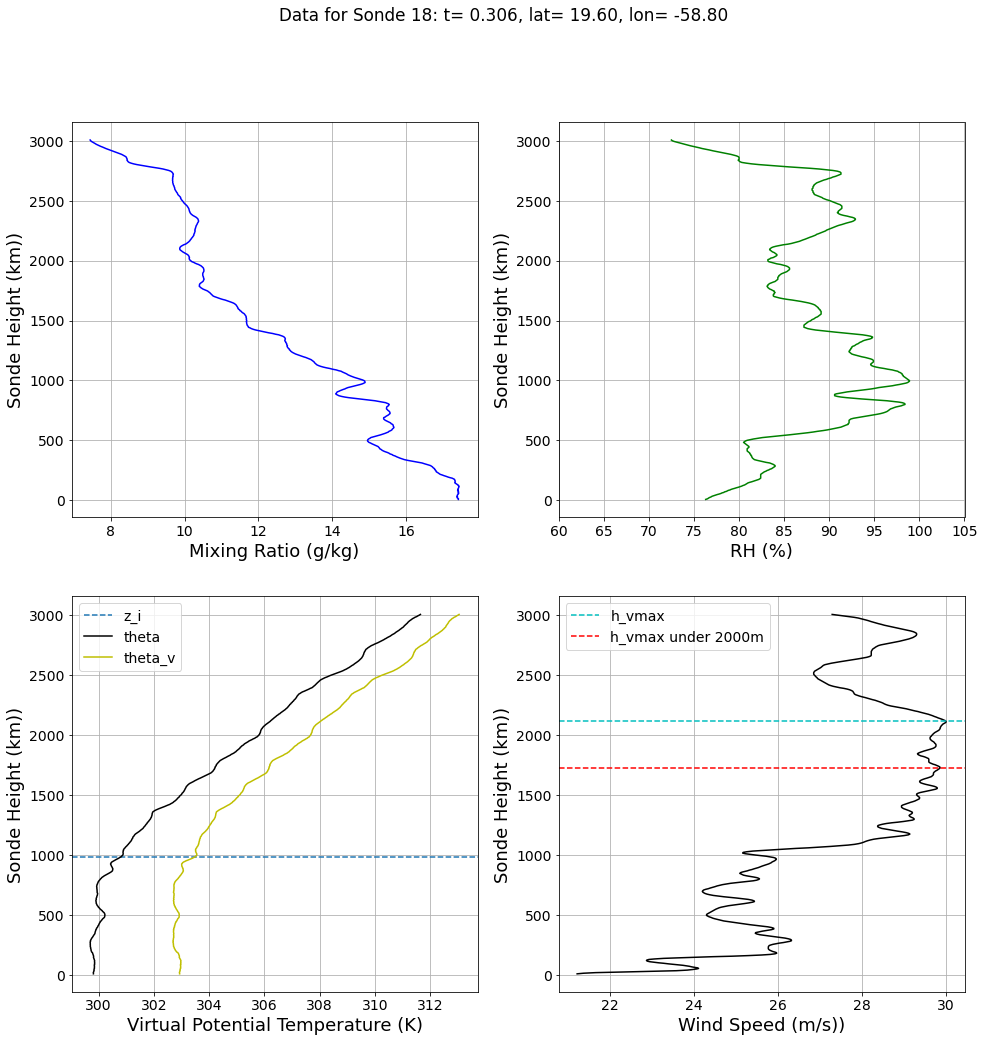

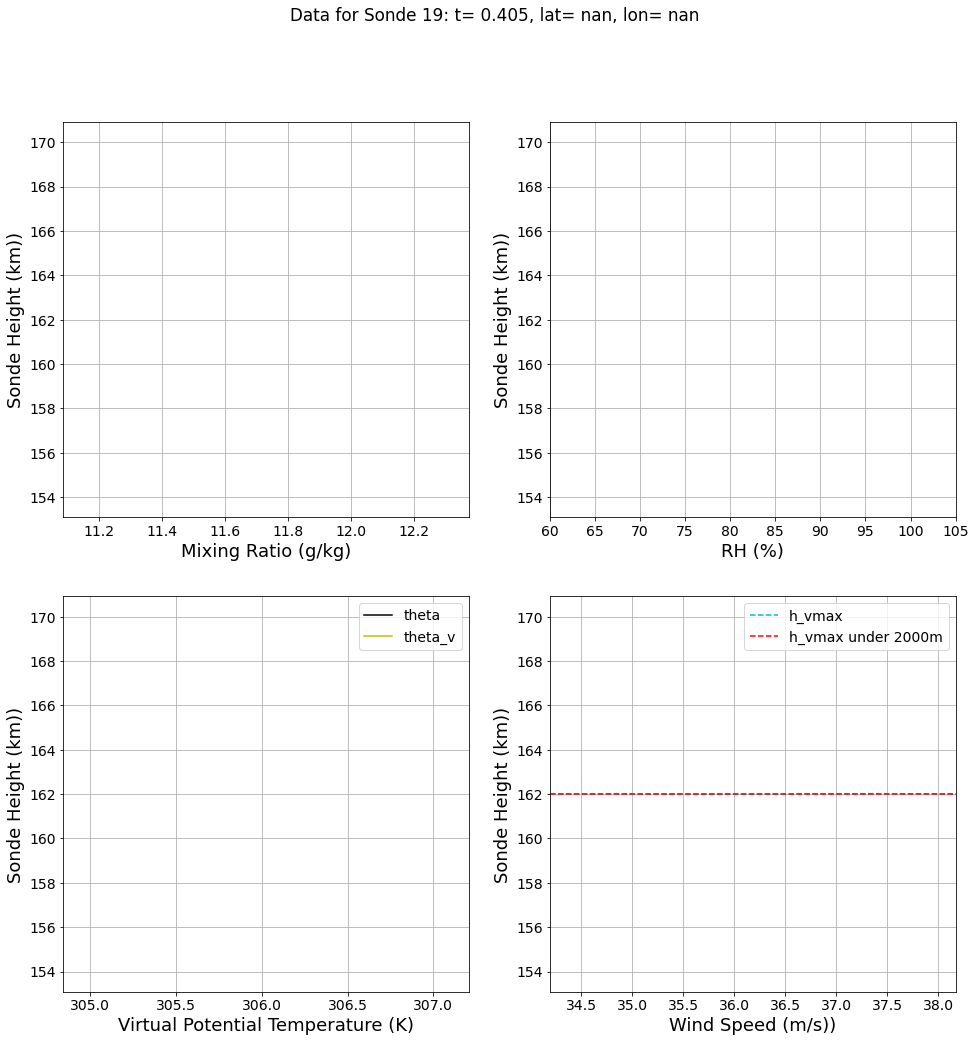

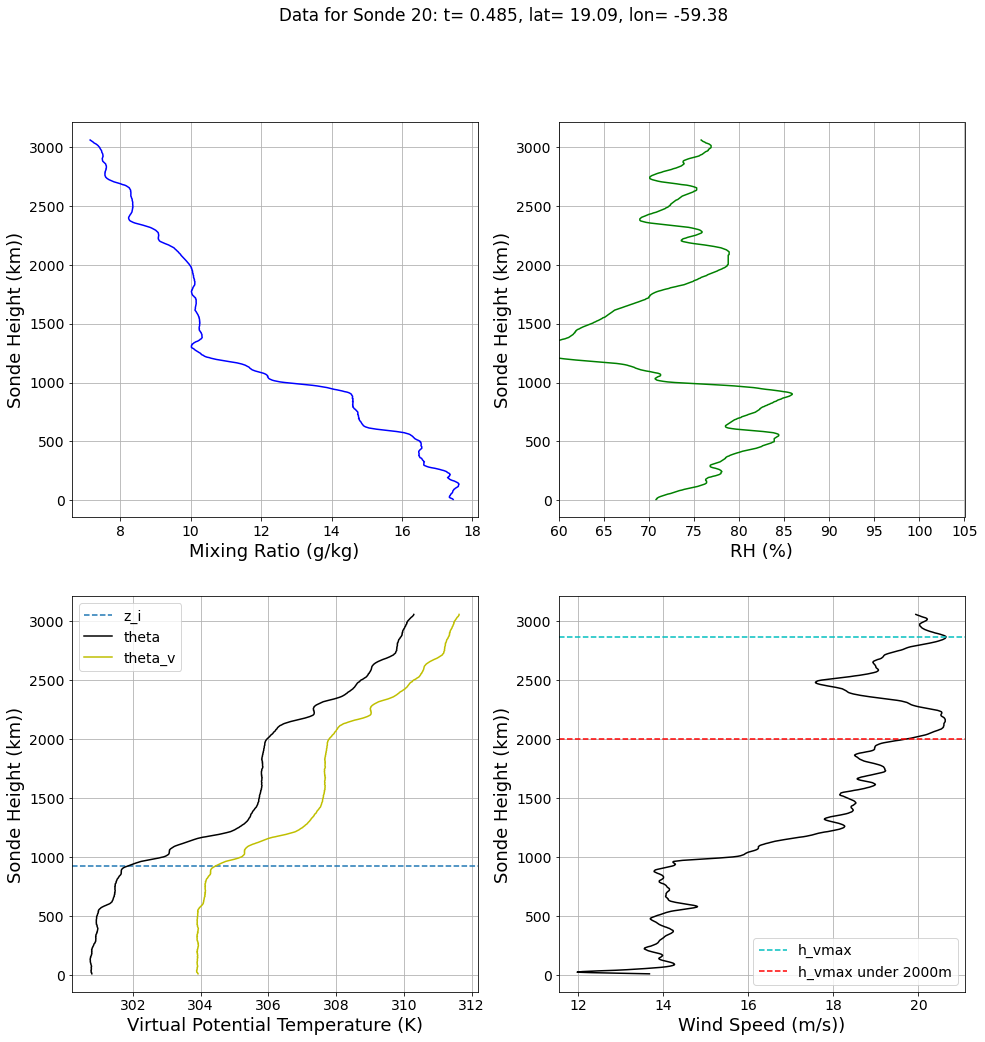

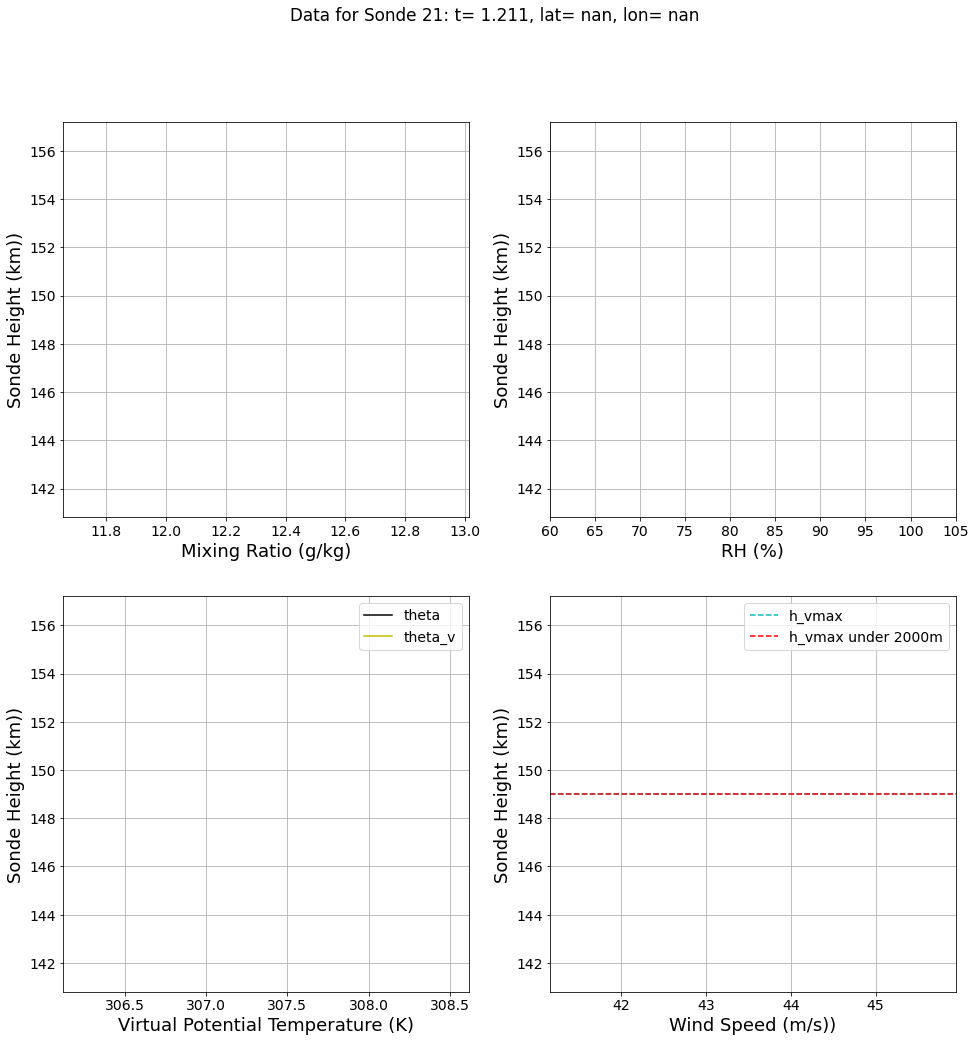

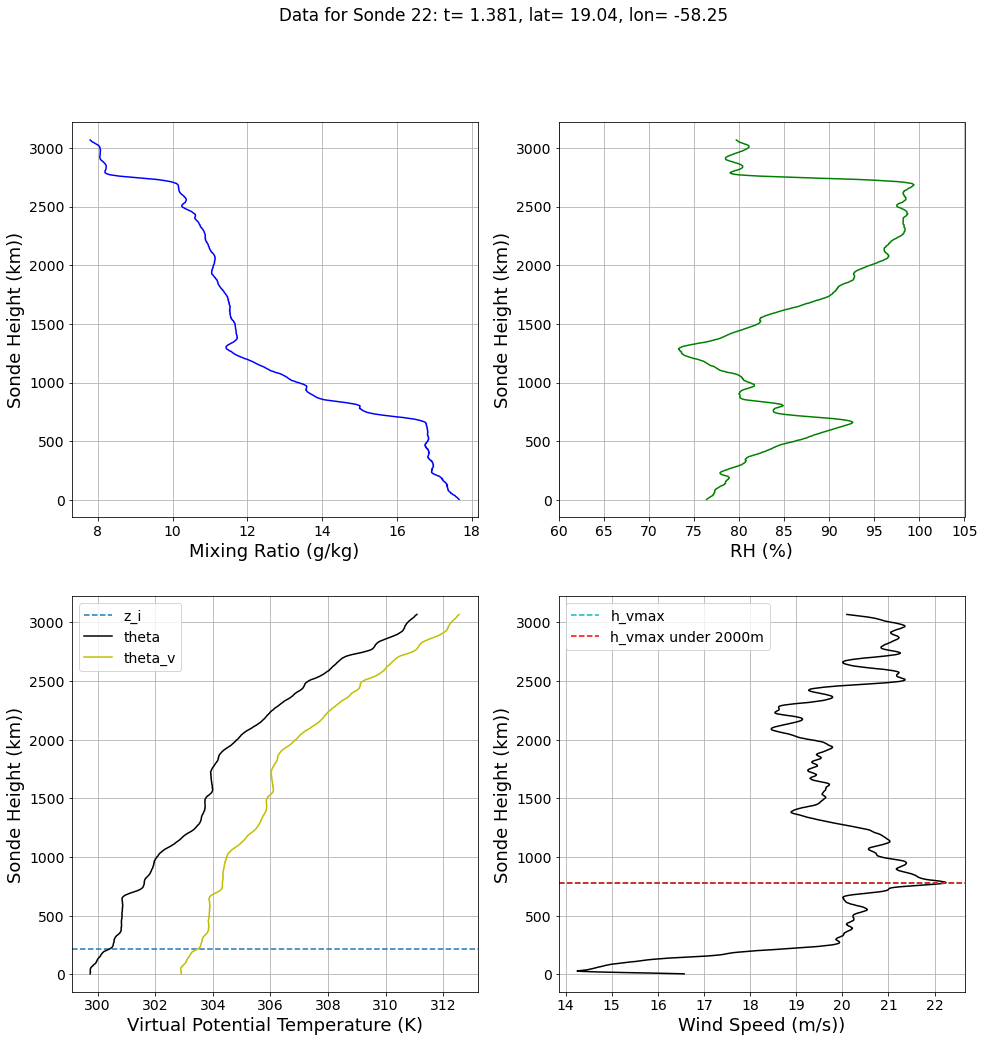

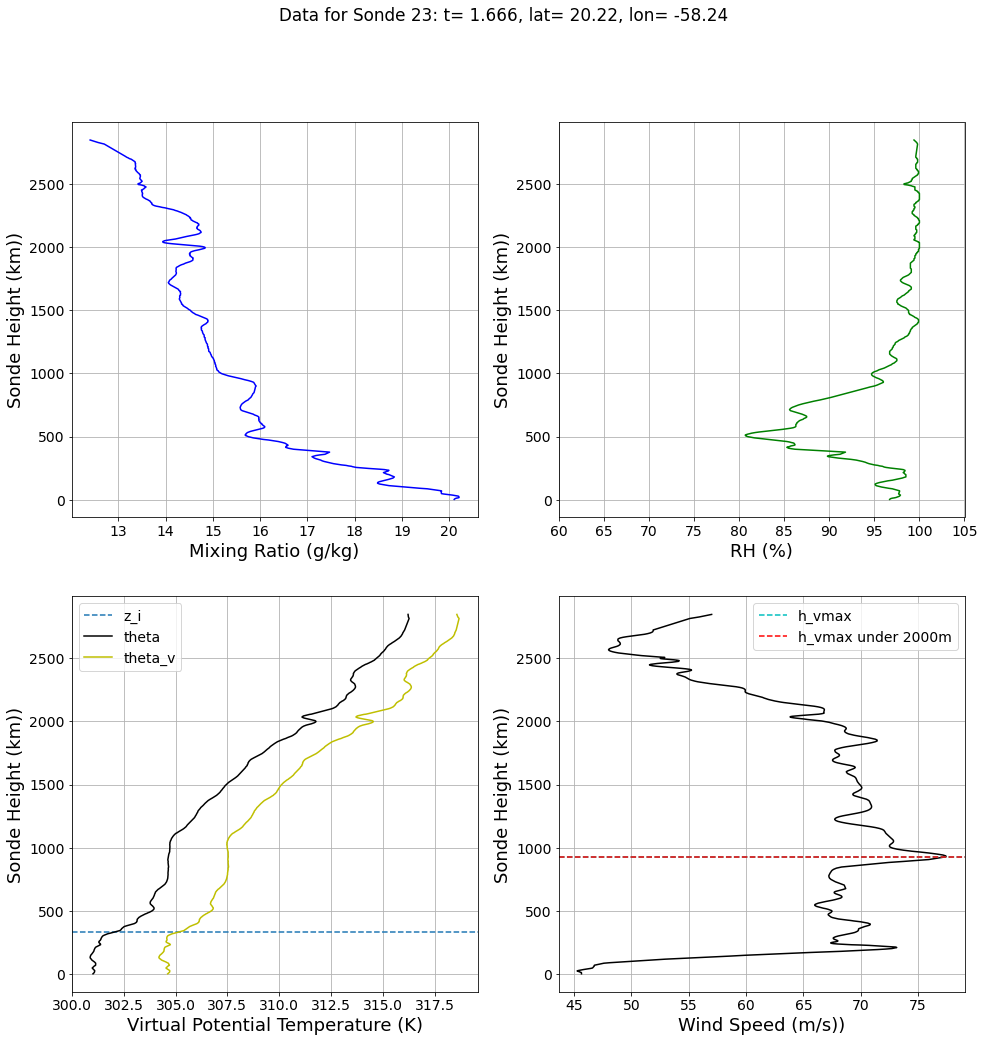

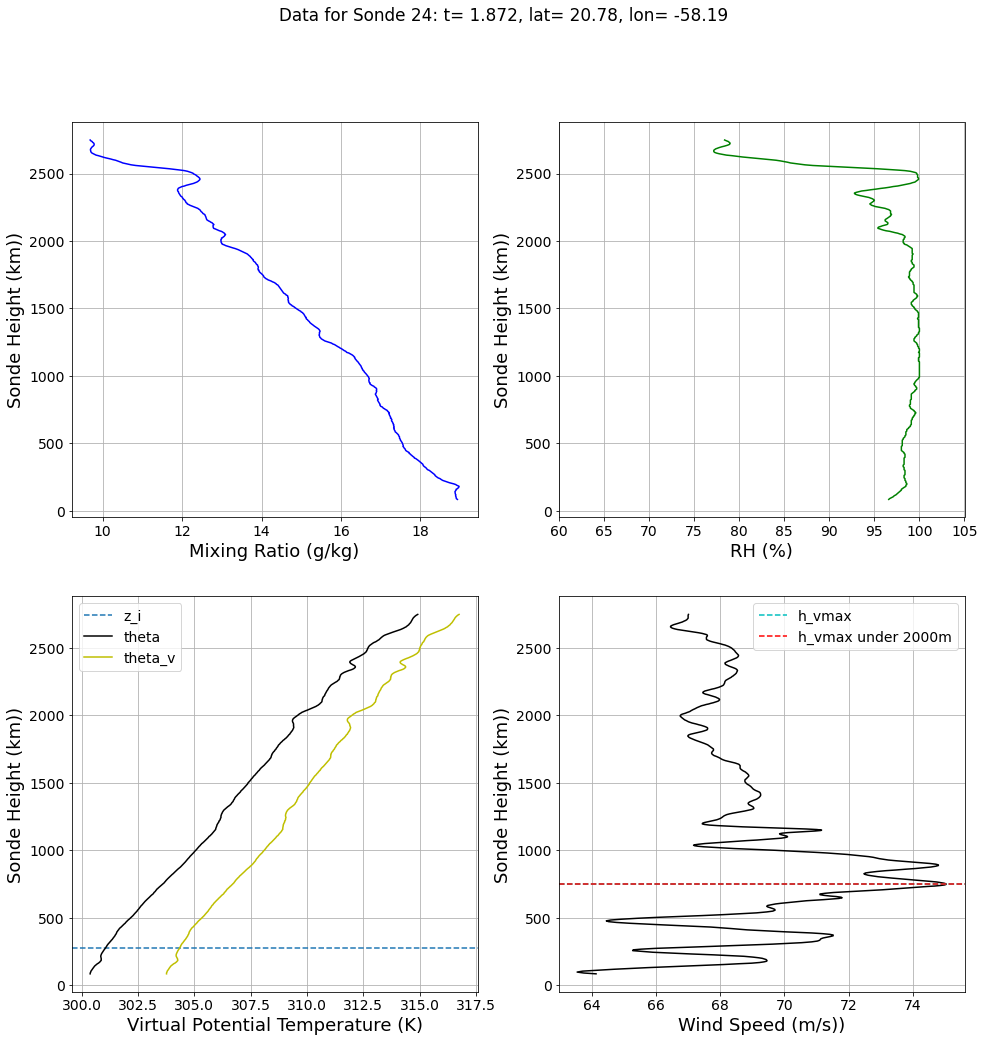

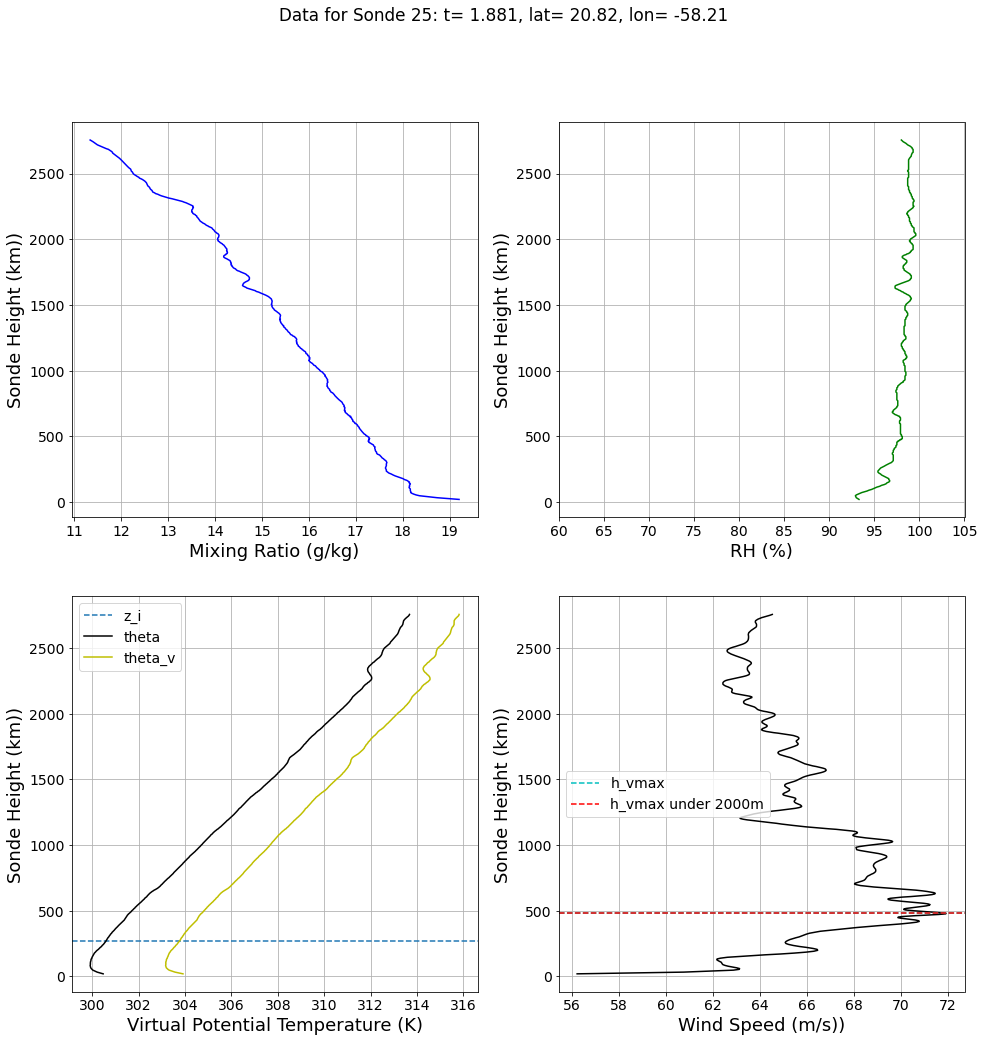

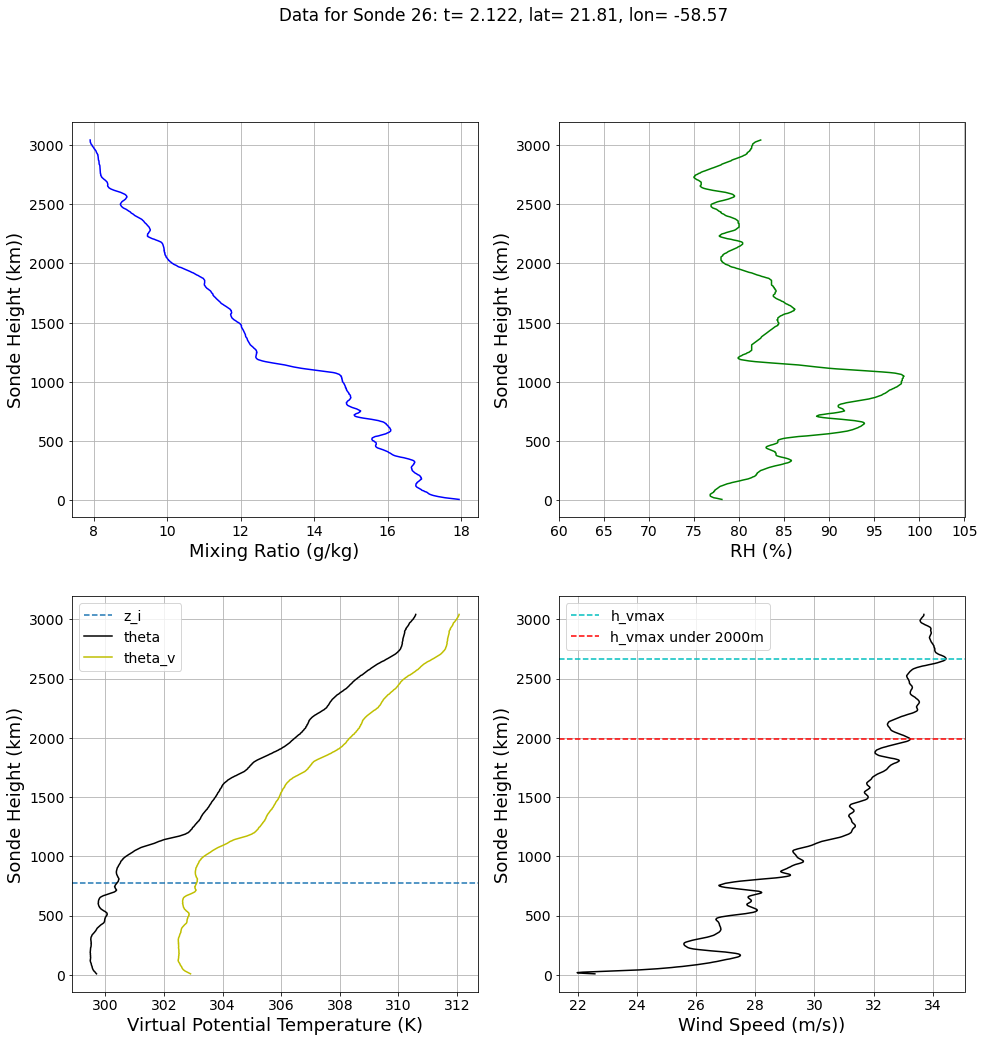

In [43]:
# repeat steps above for all sondes shown in fig 1 (goes image)! 
sounding_directory = "/Users/etmu9498/research/data/dropsondes/bl-final-project/"
sounding_list = make_plots.load_sondes( sounding_directory, print_files=False)

for i in range( len( sounding_list)): # 21, 27): # 14):    
    sounding_filename = sounding_list[ i]
    col_names = [ 'IX', 't (s)', 'P (mb)', 'T (C)', 'RH (%)', 'Z (m)', 'WD', 'WS (m/s)', 'U (m/s)', 'V (m/s)', 'NS', 
                  'WZ (m/s)', 'ZW (m)', 'FP', 'FT', 'FH', 'FW', 'LAT (N)', 'LON (E)' ]

    df = pd.read_fwf(sounding_directory+sounding_filename, 
                     skiprows=21, names=col_names) # usecols=[1, 2, 3, 4, 5, 6, 7, 8, 14],
    # trying to get rid of duplicate index, but not having any success
    df.reset_index(drop=True, inplace=True)

    # replace fill values with nans!
    df['P (mb)'].replace(-999.0, np.nan,inplace=True)
    df['T (C)'].replace(-999.00, np.nan,inplace=True)
    df['RH (%)'].replace(-999.0, np.nan,inplace=True)
    df['Z (m)'].replace(-999, np.nan,inplace=True)
    df['WD'].replace(-999, np.nan,inplace=True)

    df['WS (m/s)'].replace(-999.00, np.nan,inplace=True)
    df['U (m/s)'].replace(-999.00, np.nan,inplace=True)
    df['V (m/s)'].replace(-999.00, np.nan,inplace=True)
    df['WZ (m/s)'].replace(-999.0, np.nan,inplace=True)
    df['ZW (m)'].replace(-999, np.nan,inplace=True)
    df['WD'].replace(-999, np.nan,inplace=True)
    df['LAT (N)'].replace(-999.000, np.nan,inplace=True)
    df['LON (E)'].replace(-999.000, np.nan,inplace=True)

    # remove nans for plotting purposes
    df = df.dropna(subset=('P (mb)', 'T (C)', 'RH (%)', 'Z (m)', 'WD', 'WS (m/s)'), how='any').reset_index(drop=True)

    # rename variables into more convenient forms and calculate a couple other variables

    T = df['T (C)'].values * units.degC
    z = df['Z (m)'].values * units.m
    p = df['P (mb)'].values * units.hPa
    wind_speed = df['WS (m/s)'].values * units.mps
    wind_dir = df['WD'].values * units.degrees
    RH = df['RH (%)'].values

    theta = mpcalc.potential_temperature(p, T)   # This metpy routine calculates theta and gives it units of Kelvin
    mixing_ratio = mpcalc.mixing_ratio_from_relative_humidity(p, T, RH / 100) # This metpy routine calculates mixing ratio
    theta_v = mpcalc.virtual_potential_temperature(p, T, mixing_ratio) # metpy to calculate theta_V
    dewpoint = mpcalc.dewpoint_from_relative_humidity(T, RH)
    theta_e = mpcalc.equivalent_potential_temperature(p, T, dewpoint)

    hours = sounding_filename[ 10:12]
    mins = sounding_filename[ 12:14]
    secs = sounding_filename[ 14:16]
    time = float( hours) + float( mins) / 60 + float( secs) / 3600

    
    # make figure before loop

    # look at sondes 7-13

    plt.figure( figsize=(16, 16))
    helper_fns.change_font_sizes()
    
    strtime = str( time)[0:5]
    strlon = str( df['LON (E)'][ 0])[ 0:6]
    strlat = str( df['LAT (N)'][ 0])[ 0:5]
    plt.suptitle( "Data for Sonde " + str( i) + ": t= " + strtime + ", lat= " + strlat + ", lon= " + strlon)

    plt.subplot(221)
    plt.plot( mixing_ratio * 1000, z, c='b') 
    plt.grid('on')
    plt.ylabel( "Sonde Height (km))")
    plt.xlabel( "Mixing Ratio (g/kg)")

    '''
    plt.subplot(223)
    plt.plot( theta, z, c='k') 
    plt.grid('on') 
    plt.ylabel( "Sonde Height (km))")
    plt.xlabel( "Potential Temperature (K)")
    '''
    
    plt.subplot(223)
    
    # calculate z_i and plot it on the profile!
    threshold, theta_ati, z_i = findzi( z, theta_v)

    # account for false values == no z_i was calculated
    if not threshold:
        print( "z_i couldn't be calculated")
        pass
    else:
        print( 'threshold = ' + str(threshold) + ', theta at z_i = ' + str( theta_ati.magnitude) + ', z_i = ' + str(z_i.magnitude) )
        plt.axhline( y = z_i, linewidth=1.5, linestyle='--', label='z_i')
    
    plt.plot( theta, z, c='k', label='theta') 
    plt.plot( theta_v, z, c='y', label='theta_v')
    plt.legend()
    plt.grid('on')
    plt.ylabel( "Sonde Height (km))")
    plt.xlabel( "Virtual Potential Temperature (K)")

    
    plt.subplot(222)
    plt.plot( RH, z, c='g') 
    plt.grid('on')
    plt.ylabel( "Sonde Height (km))")
    plt.xlabel( "RH (%)")
    plt.xlim( [60, 105])

    
    plt.subplot(224)
    plt.plot( wind_speed, z, c='k') 

    # find and plot max wind speed height: no filter
    hvmax = findvmax( z, wind_speed)
    plt.axhline( y=hvmax, linewidth=1.5, linestyle='--', c='c', label='h_vmax')
    
    # find and plot max wind speed height: 2000 m filter
    hvmax = findvmax( z, wind_speed, maxh=2000.0)
    plt.axhline( y=hvmax, linewidth=1.5, linestyle='--', c='r', label='h_vmax under 2000m')
    plt.legend()
    plt.grid('on') 
    plt.ylabel( "Sonde Height (km))")
    plt.xlabel( "Wind Speed (m/s))")

    
    os.chdir("/Users/etmu9498/research/figures/bl-final-project/sondes")
    
    # special name formatting to make images line up in order in folder!
    if i < 10:
        plt.savefig("sonde0" + str(i) + "_" + sounding_filename[10:12] + '-' + sounding_filename[12:14] + '-' + sounding_filename[14:16] + ".png")
    else:
        plt.savefig("sonde" + str(i) + "_" + sounding_filename[10:12] + '-' + sounding_filename[12:14] + '-' + sounding_filename[14:16] + ".png")
        
    print( "sonde plot " + str(i) + " saved\n\n\n")

In [4]:
###############################################
## Testing cells
###############################################










# cell testing: can zhien's datasets be read automatically by xarray?
# it doesn't seem so... :(

'''
sonde_path_zhien = "/Users/etmu9498/research/data/dropsondes/zhien-data"
os.chdir( sonde_path_zhien)
sonde = xr.open_dataset( "D20210929_224536QC.FRD")
sonde
'''

'\nsonde_path_zhien = "/Users/etmu9498/research/data/dropsondes/zhien-data"\nos.chdir( sonde_path_zhien)\nsonde = xr.open_dataset( "D20210929_224536QC.FRD")\nsonde\n'

In [7]:
# code inspired by Julie's email and "quiz1" found in my BLM22 directory in jupyterlab!
sounding_directory = "/Users/etmu9498/research/data/dropsondes/zhien-data/"
sounding_filename = "D20210929_224536QC.FRD"


# exploring datasets
# read in the text file and pull all the lines, including the header
file = open(sounding_directory+sounding_filename,"r")
lines_header = file.readlines() 

# save only lines with numbers (get rid of the header)
lines = lines_header[21:-1]

# print(lines_header[0:21])
# print( lines)


col_names = [ 'IX', 't (s)', 'P (mb)', 'T (C)', 'RH (%)', 'Z (m)', 'WD', 'WS (m/s)', 'U (m/s)', 'V (m/s)', 'NS', 
              'WZ (m/s)', 'ZW (m)', 'FP', 'FT', 'FH', 'FW', 'LAT (N)', 'LON (E)' ]

df = pd.read_fwf(sounding_directory+sounding_filename, 
                 skiprows=21, names=col_names) # usecols=[1, 2, 3, 4, 5, 6, 7, 8, 14],
# trying to get rid of duplicate index, but not having any success
df.reset_index(drop=True, inplace=True)

# replace fill values with nans!
df['P (mb)'].replace(-999.0, np.nan,inplace=True)
df['T (C)'].replace(-999.00, np.nan,inplace=True)
df['RH (%)'].replace(-999.0, np.nan,inplace=True)
df['Z (m)'].replace(-999, np.nan,inplace=True)
df['WD'].replace(-999, np.nan,inplace=True)

df['WS (m/s)'].replace(-999.00, np.nan,inplace=True)
df['U (m/s)'].replace(-999.00, np.nan,inplace=True)
df['V (m/s)'].replace(-999.00, np.nan,inplace=True)
df['WZ (m/s)'].replace(-999.0, np.nan,inplace=True)
df['ZW (m)'].replace(-999, np.nan,inplace=True)
df['WD'].replace(-999, np.nan,inplace=True)
df['LAT (N)'].replace(-999.000, np.nan,inplace=True)
df['LON (E)'].replace(-999.000, np.nan,inplace=True)

# remove nans for plotting purposes
df = df.dropna(subset=('P (mb)', 'T (C)', 'RH (%)', 'Z (m)', 'WD', 'WS (m/s)'), how='any').reset_index(drop=True)


df

,IX,t (s),P (mb),T (C),RH (%),Z (m),WD,WS (m/s),U (m/s),V (m/s),NS,WZ (m/s),ZW (m),FP,FT,FH,FW,LAT (N),LON (E)
0,95,23.5,689.0,11.14,100.0,2902.0,355.0,61.93,5.82,-61.66,12,7.9,2902.0,0,0,0,0,20.176,-58.200
1,99,24.5,689.4,11.11,100.0,2898.0,353.0,62.89,7.74,-62.41,12,7.2,2898.0,0,0,0,0,20.175,-58.200
2,105,26.0,690.0,11.06,100.0,2891.0,351.0,64.29,10.29,-63.46,10,6.4,2891.0,0,0,0,0,20.175,-58.200
3,107,26.5,690.2,11.04,100.0,2888.0,350.0,64.70,10.95,-63.76,12,6.3,2888.0,0,0,0,0,20.174,-58.200
4,109,27.0,690.5,11.03,100.0,2885.0,350.0,65.06,11.49,-64.04,11,6.2,2885.0,0,0,0,0,20.174,-58.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1319,29.5,961.9,23.58,96.9,42.0,282.0,60.69,59.41,-12.40,11,-0.6,42.0,0,0,0,0,20.037,-58.089
547,1321,30.0,962.5,23.65,96.8,37.0,282.0,60.55,59.21,-12.69,10,-0.5,37.0,0,0,0,0,20.037,-58.089
548,1323,30.5,963.1,23.73,96.7,31.0,282.0,60.51,59.16,-12.73,10,-0.4,31.0,0,0,0,0,20.037,-58.088
549,1325,31.0,963.7,23.82,96.6,26.0,282.0,60.34,59.06,-12.35,10,-0.4,26.0,0,0,0,0,20.037,-58.088


In [8]:
# rename variables into more convenient forms and calculate a couple other variables

T = df['T (C)'].values * units.degC
z = df['Z (m)'].values * units.m
p = df['P (mb)'].values * units.hPa
wind_speed = df['WS (m/s)'].values * units.mps
wind_dir = df['WD'].values * units.degrees
RH = df['RH (%)'].values

theta = mpcalc.potential_temperature(p, T)   # This metpy routine calculates theta and gives it units of Kelvin
mixing_ratio = mpcalc.mixing_ratio_from_relative_humidity(p, T, RH / 100) # This metpy routine calculates mixing ratio
theta_v = mpcalc.virtual_potential_temperature(p, T, mixing_ratio) # metpy to calculate theta_V
dewpoint = mpcalc.dewpoint_from_relative_humidity(T, RH)
theta_e = mpcalc.equivalent_potential_temperature(p, T, dewpoint)


'''
var = mixing_ratio
print( type( var))
np.set_printoptions(threshold=np.inf)
print( theta_e)
np.set_printoptions(threshold=1000)
'''

print( z.magnitude)
zi = findzi( z, theta_v)

print( zi)

#     theta = mpcalc.potential_temperature(p, T)   # This metpy routine calculates theta and gives it units of Kelvin
#     RH = mpcalc.relative_humidity_from_dewpoint(T, Td)  # This metpy routine calculates relative humidity
#     mixing_ratio = mpcalc.mixing_ratio_from_relative_humidity(RH, T, p) # This metpy routine calculates mixing ratio
#     theta_v=mpcalc.virtual_potential_temperature(p, T, mixing_ratio) # metpy to calculate theta_V

[2902. 2898. 2891. 2888. 2885. 2882. 2879. 2876. 2874. 2872. 2870. 2867.
 2865. 2863. 2861. 2859. 2856. 2853. 2850. 2847. 2844. 2840. 2837. 2833.
 2829. 2798. 2793. 2788. 2784. 2779. 2774. 2770. 2761. 2757. 2753. 2749.
 2745. 2741. 2737. 2733. 2729. 2725. 2651. 2649. 2647. 2645. 2643. 2641.
 2639. 2638. 2636. 2634. 2633. 2631. 2629. 2626. 2624. 2621. 2619. 2617.
 2614. 2612. 2610. 2607. 2605. 2603. 2600. 2598. 2595. 2592. 2590. 2587.
 2584. 2581. 2578. 2571. 2568. 2564. 2560. 2557. 2553. 2549. 2546. 2542.
 2538. 2534. 2530. 2526. 2522. 2517. 2513. 2509. 2504. 2500. 2495. 2491.
 2486. 2482. 2478. 2473. 2469. 2464. 2460. 2456. 2451. 2447. 2443. 2440.
 2436. 2432. 2428. 2425. 2421. 2418. 2414. 2411. 2403. 2400. 2396. 2392.
 2388. 2384. 2379. 2375. 2371. 2366. 2361. 2357. 2352. 2347. 2342. 2337.
 2333. 2328. 2323. 2318. 2313. 2309. 2304. 2294. 2289. 2284. 2280. 2275.
 2270. 2265. 2261. 2252. 2248. 2244. 2241. 2229. 2226. 2223. 2221. 2218.
 2215. 2212. 2209. 2205. 2202. 2198. 2194. 2189. 21

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\metpy\calc\thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\pint\quantity.py:1568: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


In [9]:
# make a quick plot to explore data like in "spatial dists and values of dropsondes.ipynb"

# get time for current sonde
hours = sounding_filename[ 10:12]
mins = sounding_filename[ 12:14]
secs = sounding_filename[ 14:16]

time = float( hours) + float( mins) / 60 + float( secs) / 3600
print( time)

22.76


Text(0.5, 0, 'Virtual Potential Temperature (K)')

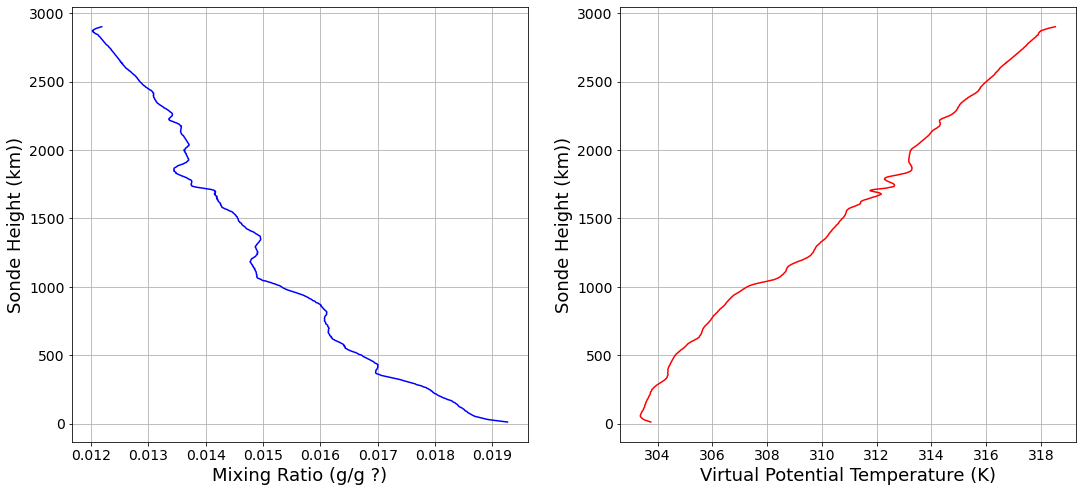

In [10]:
# make figure before loop

# look at sondes 7-13

plt.figure( figsize=(18, 8))
helper_fns.change_font_sizes()

plt.subplot(121)
plt.plot( mixing_ratio, z, c='b') 
plt.grid('on')
plt.ylabel( "Sonde Height (km))")
plt.xlabel( "Mixing Ratio (g/g ?)")

plt.subplot(122)
plt.plot( theta_v, z, c='r') 
# plt.plot( theta, z, c='k') 

plt.grid('on')
plt.ylabel( "Sonde Height (km))")
plt.xlabel( "Virtual Potential Temperature (K)")
